Las Vegas has tradtionally posessed and 'edge' on the betting public. They historically try to put lines in that the public will bet evenly on both sides. However, if the public a good parameter of whether the line is accurate? In this age of endless informaiton, shouldn't we expect the public to be able to come out profitable? Not so, as according to usbets.com* and ESPN* reportint monthly highs for sports books in October and November of 2020. 

Nevertheless, there are still professional sports gamblers. Even though it's been said only between 3-10% of long term sports bettors are actually profitable. Because sports books take a percentage (referred to a vig or juice) they wish to set the line where the public bets both sides at a 50/50 split, thereby paying the winner with the losers contributions, and pocketing their vig (often 10%). Knowing this, it's not hard to imagine why these books are so profitable. A better way to look at the setup is the following quote from medium:

"To ensure profit, the bookmaker need not be able to predict the outcome of games more accurately than bettors — the bookmaker merely needs to predict bettor preferences so as to balance wagers on each side."

So when does the public inflate numbers? How can we spot this? And more importantly, how can we recognize these trends to profit off the inefficiencies of the market? 

The steps we'll perform to better understand this is:

1. Looking at every team as the total of the seasons achievement.
2. isolating week by week data to see which teams "cover" and which teams don't.
3. Examine pre-game trends and notice if there's profitabe spots.


"The online sports gambling industry employs teams of data analysts to build forecast models that turn the odds at sports games in their favour. While several betting strategies have been proposed to beat bookmakers, from expert prediction models and arbitrage strategies to odds bias exploitation, their returns have been inconsistent and it remains to be shown that a betting strategy can outperform the online sports betting market.


1. https://www.usbets.com/october-2020-record-sports-betting-numbers/
2. https://www.espn.com/chalk/story/_/id/30620013/nevada-sportsbooks-biggest-month-ever-618m-november
3. https://arxiv.org/pdf/1710.02824.pdf
4. http://professionalgambler.org/winning-percentages#:~:text=Professional%20sports%20bettors%20rarely%20sustain,as%2053%20or%2054%20percent.
5. https://sporita.com/blog/a-glance-at-the-football-prediction-algorithm?utm_source=Quora&utm_medium=Organic&utm_campaign=Answer_20122019
6. https://medium.com/the-intelligent-sports-wagerer/why-52-4-is-the-most-important-percentage-in-sports-gambling-16ade8003c04
7. https://www.espn.com/blog/statsinfo/post/_/id/123048/a-guide-to-nfl-fpi
8. https://www.espn.com/nfl/story/_/id/8379024/nfl-explaining-expected-points-metric


In [627]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import tree
import datetime
import re


from bs4 import BeautifulSoup

import requests

from urllib.request import urlopen

df = pd.read_csv('NFL_data.csv')
df.head()

,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Home Odds Open,Home Odds Min,Home Odds Max,...,Away Line Close,Total Score Open,Total Score Min,Total Score Max,Total Score Close,Open vs Close,Game Difference,Vegas Open vs Actual,Vegas Close vs Actual,Winner
0,2021-01-03,Philadelphia Eagles,Washington Football Team,14,20,NaN,NaN,1.86,1.86,3.4,...,-6.5,42.5,42.5,44.0,43.5,-7.5,-6.0,-7.0,0.5,Washington Football Team
1,2021-01-03,Chicago Bears,Green Bay Packers,16,35,NaN,NaN,3.20,2.70,3.2,...,-4.5,50.0,48.5,52.0,48.5,-0.5,-19.0,-15.0,-14.5,Green Bay Packers
2,2021-01-03,Denver Broncos,Las Vegas Raiders,31,32,NaN,NaN,1.90,1.90,2.3,...,-2.5,51.0,50.0,51.0,50.5,-3.5,-1.0,-2.0,1.5,Las Vegas Raiders
3,2021-01-03,Kansas City Chiefs,Los Angeles Chargers,21,38,NaN,NaN,2.65,2.65,3.4,...,-6.5,44.0,42.0,44.0,43.0,-3.0,-17.0,-13.5,-10.5,Los Angeles Chargers
4,2021-01-03,Los Angeles Rams,Arizona Cardinals,18,7,NaN,NaN,1.83,1.76,2.6,...,1.0,39.5,39.5,42.0,42.0,0.0,11.0,10.0,10.0,Los Angeles Rams


In [628]:
df.columns

Index(['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score',
       'Overtime?', 'Playoff Game?', 'Home Odds Open', 'Home Odds Min',
       'Home Odds Max', 'Home Odds Close', 'Away Odds Open', 'Away Odds Min',
       'Away Odds Max', 'Away Odds Close', 'Home Line Open', 'Home Line Min',
       'Home Line Max', 'Home Line Close', 'Away Line Open', 'Away Line Min',
       'Away Line Max', 'Away Line Close', 'Total Score Open',
       'Total Score Min', 'Total Score Max', 'Total Score Close',
       'Open vs Close', 'Game Difference', 'Vegas Open vs Actual',
       'Vegas Close vs Actual', 'Winner'],
      dtype='object')

In [629]:
df['Date'] = pd.to_datetime(df['Date'])
df.drop(['Overtime?', 'Playoff Game?'], axis =1, inplace=True)

In [630]:
df

,Date,Home Team,Away Team,Home Score,Away Score,Home Odds Open,Home Odds Min,Home Odds Max,Home Odds Close,Away Odds Open,...,Away Line Close,Total Score Open,Total Score Min,Total Score Max,Total Score Close,Open vs Close,Game Difference,Vegas Open vs Actual,Vegas Close vs Actual,Winner
0,2021-01-03,Philadelphia Eagles,Washington Football Team,14,20,1.86,1.86,3.4,3.30,1.95,...,-6.5,42.5,42.5,44.0,43.5,-7.5,-6.0,-7.0,0.5,Washington Football Team
1,2021-01-03,Chicago Bears,Green Bay Packers,16,35,3.20,2.70,3.2,2.80,1.37,...,-4.5,50.0,48.5,52.0,48.5,-0.5,-19.0,-15.0,-14.5,Green Bay Packers
2,2021-01-03,Denver Broncos,Las Vegas Raiders,31,32,1.90,1.90,2.3,2.25,1.90,...,-2.5,51.0,50.0,51.0,50.5,-3.5,-1.0,-2.0,1.5,Las Vegas Raiders
3,2021-01-03,Kansas City Chiefs,Los Angeles Chargers,21,38,2.65,2.65,3.4,3.40,1.54,...,-6.5,44.0,42.0,44.0,43.0,-3.0,-17.0,-13.5,-10.5,Los Angeles Chargers
4,2021-01-03,Los Angeles Rams,Arizona Cardinals,18,7,1.83,1.76,2.6,1.83,2.00,...,1.0,39.5,39.5,42.0,42.0,0.0,11.0,10.0,10.0,Los Angeles Rams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,2006-09-10,Detroit Lions,Seattle Seahawks,6,9,3.50,NaN,NaN,NaN,1.33,...,NaN,44.0,NaN,NaN,NaN,6.0,-3.0,3.0,-3.0,Seattle Seahawks
3990,2006-09-10,Cleveland Browns,New Orleans Saints,14,19,1.50,NaN,NaN,NaN,2.75,...,NaN,36.5,NaN,NaN,NaN,-3.0,-5.0,-8.0,-5.0,New Orleans Saints
3991,2006-09-10,Carolina Panthers,Atlanta Falcons,6,20,1.43,NaN,NaN,NaN,2.90,...,NaN,38.5,NaN,NaN,NaN,-4.5,-14.0,-18.5,-14.0,Atlanta Falcons
3992,2006-09-10,Arizona Cardinals,San Francisco 49ers,34,27,1.18,NaN,NaN,NaN,5.00,...,NaN,43.5,NaN,NaN,NaN,-9.5,7.0,-2.5,7.0,Arizona Cardinals


Add column for year, month, day so they can be combined. Also team. 

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994 entries, 0 to 3993
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   3994 non-null   datetime64[ns]
 1   Home Team              3994 non-null   object        
 2   Away Team              3994 non-null   object        
 3   Home Score             3994 non-null   int64         
 4   Away Score             3994 non-null   int64         
 5   Home Odds Open         3994 non-null   float64       
 6   Home Odds Min          1858 non-null   float64       
 7   Home Odds Max          1858 non-null   float64       
 8   Home Odds Close        1858 non-null   float64       
 9   Away Odds Open         3994 non-null   float64       
 10  Away Odds Min          1858 non-null   float64       
 11  Away Odds Max          1858 non-null   float64       
 12  Away Odds Close        1858 non-null   float64       
 13  Hom

# Week by Week Results

In [632]:
def Weekly(url):
    df = pd.read_html(url, parse_dates = True)[0]
    df = pd.DataFrame(df)
    df = df.apply(pd.to_numeric, errors = 'ignore')
    df = df[df.Week != 'Week']
    df.dropna(how = 'all', axis = 0)
    return df


In [633]:
years = []
for x in range(2021):
    if x >=2006:
        years.append(x)
        

In [634]:
url = 'https://www.pro-football-reference.com/years/2020/games.htm'
WbW = {}
y = 2006
for x in years:
    print(x)
    url = 'https://www.pro-football-reference.com/years/'+ str(x) + '/games.htm'
    x =  Weekly(url)
    WbW[y] = x
    
    WbW[y] = pd.DataFrame(WbW[y])
    
   
    WbW[y] = WbW[y].dropna(how = 'all', axis = 0)
        
    
    
    a = WbW[y]

    a = a.apply(pd.to_numeric, errors = 'ignore')
    
    a = WbW[y][~WbW[y]["Date"].str.contains("Playoffs")]
    
    WbW[y] = a
    
    WbW[y] = WbW[y].apply(pd.to_numeric, errors = 'ignore')
    
    WbW[y]['Date'] = pd.to_datetime(WbW[y]['Date'], errors = 'ignore')
    
#Adjusting the 'Time' column 
    
    WbW[y]['Time'] = WbW[y]['Time'].str.rstrip('PM')
    WbW[y]['Time'] = WbW[y]['Time'].str.rstrip('A')
    
    WbW[y]['Time'] = pd.to_datetime(WbW[y]['Time'], format='%H:%M').dt.time
    
    y += 1
    


2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [635]:
url = 'https://www.pro-football-reference.com/years/2020/games.htm'
WbW = pd.DataFrame()
for x in years:
    print(x)
    url = 'https://www.pro-football-reference.com/years/'+ str(x) + '/games.htm'
    p =  Weekly(url)
    z = pd.DataFrame(p)
    z['Year'] = x
    
   
    z = z.dropna(how = 'all', axis = 0)
        
    
    
    a = z

    a = a.apply(pd.to_numeric, errors = 'ignore')
    
    a = z[~z["Date"].str.contains("Playoffs")]
    
    z = a
    
    z = z.apply(pd.to_numeric, errors = 'ignore')
    
    z.drop(z.columns[[5,7]], axis=1, inplace = True)
    
#Adjusting the 'Time' column 
    
    z['Time'] = z['Time'].str.rstrip('PM')
    z['Time'] = z['Time'].str.rstrip('A')
    
    z['Time'] = pd.to_datetime(z['Time'], format='%H:%M').dt.time
    
    WbW = WbW.append(z, ignore_index= True)
    WbW['Date'] = pd.to_datetime(WbW['Date'], errors = 'coerce')
    

2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


Save Scrapped Data to a csv so we won't have to worry about PFF changing their website format, thus changing our cleaning process.

In [636]:
!pwd

/Users/alecnigh/Documents/DataScienceGuidedCapstone-master/Final_Project/Capstone_project


In [637]:


# save the data to a new csv file
datapath = '/Users/alecnigh/Documents/DataScienceGuidedCapstone-master/Final_Project/Capstone_project/'
WbW.to_csv(datapath + 'Week_by_week.csv')

Below is the code we wrote to add a year to the year column in the data.

In [638]:
WbW.head(25)

,Week,Day,Date,Time,Winner/tie,Loser/tie,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Year
0,1,Thu,2006-09-07,08:37:00,Pittsburgh Steelers,Miami Dolphins,28,17,342,1,278,2,2006
1,1,Sun,2006-09-10,01:00:00,Cincinnati Bengals,Kansas City Chiefs,23,10,236,1,289,3,2006
2,1,Sun,2006-09-10,01:01:00,Baltimore Ravens,Tampa Bay Buccaneers,27,0,271,0,142,3,2006
3,1,Sun,2006-09-10,01:02:00,New England Patriots,Buffalo Bills,19,17,319,2,240,0,2006
4,1,Sun,2006-09-10,01:02:00,St. Louis Rams,Denver Broncos,18,10,320,0,259,5,2006
5,1,Sun,2006-09-10,01:02:00,Philadelphia Eagles,Houston Texans,24,10,441,1,241,0,2006
6,1,Sun,2006-09-10,01:03:00,Atlanta Falcons,Carolina Panthers,20,6,385,0,215,2,2006
7,1,Sun,2006-09-10,01:03:00,New York Jets,Tennessee Titans,23,16,393,2,328,3,2006
8,1,Sun,2006-09-10,01:04:00,Seattle Seahawks,Detroit Lions,9,6,264,1,251,1,2006
9,1,Sun,2006-09-10,01:04:00,New Orleans Saints,Cleveland Browns,19,14,326,2,186,3,2006


In [639]:
WbW[WbW['Winner/tie'] == 'Kansas City Chiefs']


,Week,Day,Date,Time,Winner/tie,Loser/tie,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Year
46,4,Sun,2006-10-01,01:00:00,Kansas City Chiefs,San Francisco 49ers,41,0,333,0,165,4,2006
69,5,Sun,2006-10-08,04:05:00,Kansas City Chiefs,Arizona Cardinals,23,20,301,2,298,1,2006
87,7,Sun,2006-10-22,01:00:00,Kansas City Chiefs,San Diego Chargers,30,27,355,1,349,3,2006
100,8,Sun,2006-10-29,01:00:00,Kansas City Chiefs,Seattle Seahawks,35,28,499,3,240,2,2006
120,9,Sun,2006-11-05,01:02:00,Kansas City Chiefs,St. Louis Rams,31,17,317,0,452,3,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,14,Sun,2020-12-13,01:00:00,Kansas City Chiefs,Miami Dolphins,33,27,448,4,367,1,2020
3959,15,Sun,2020-12-20,04:25:00,Kansas City Chiefs,New Orleans Saints,32,29,411,1,285,1,2020
3966,16,Sun,2020-12-27,01:00:00,Kansas City Chiefs,Atlanta Falcons,17,14,395,2,367,1,2020
4002,Division,Sun,2021-01-17,03:05:00,Kansas City Chiefs,Cleveland Browns,22,17,438,1,308,2,2020


In [640]:
New = pd.DataFrame()
New =  WbW[['Date', 'Time', 'Week', 'Year', 'Winner/tie', 'PtsW', 'YdsW', 'TOW', 'Loser/tie', 'PtsL', 'YdsL', 'TOL']]


In [641]:
WbW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007 entries, 0 to 4006
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Week        4007 non-null   object        
 1   Day         4007 non-null   object        
 2   Date        4007 non-null   datetime64[ns]
 3   Time        4007 non-null   object        
 4   Winner/tie  4007 non-null   object        
 5   Loser/tie   4007 non-null   object        
 6   PtsW        4007 non-null   int64         
 7   PtsL        4007 non-null   int64         
 8   YdsW        4007 non-null   int64         
 9   TOW         4007 non-null   int64         
 10  YdsL        4007 non-null   int64         
 11  TOL         4007 non-null   int64         
 12  Year        4007 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 407.1+ KB


Our dataframe looks excellent. It's time to clean up the data, get rid of some redundent columns, and set the winner equal to a number so our model can work with it. 

In [642]:
result = pd.merge(df, WbW, left_on=["Date",'Winner'], right_on = ['Date', 'Winner/tie'])


In [643]:
# Getting a winner column in binary using boolean logic and then converting it to an integer

result['Winner'] = (result['Home Score'] > result['Away Score']) == 1

result['Winner'] = result["Winner"].astype(int)


#result['Week'] = result['Week'].astype(int)

#Dropping the win lose columns so we can work our way to predicting them
result = result.drop(['Winner/tie', 'Loser/tie', ], axis = 1)


In [644]:
result.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3989 entries, 0 to 3988
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   3989 non-null   datetime64[ns]
 1   Home Team              3989 non-null   object        
 2   Away Team              3989 non-null   object        
 3   Home Score             3989 non-null   int64         
 4   Away Score             3989 non-null   int64         
 5   Home Odds Open         3989 non-null   float64       
 6   Home Odds Min          1854 non-null   float64       
 7   Home Odds Max          1854 non-null   float64       
 8   Home Odds Close        1854 non-null   float64       
 9   Away Odds Open         3989 non-null   float64       
 10  Away Odds Min          1854 non-null   float64       
 11  Away Odds Max          1854 non-null   float64       
 12  Away Odds Close        1854 non-null   float64       
 13  Hom

In [645]:
result.corr()

,Home Score,Away Score,Home Odds Open,Home Odds Min,Home Odds Max,Home Odds Close,Away Odds Open,Away Odds Min,Away Odds Max,Away Odds Close,...,Vegas Open vs Actual,Vegas Close vs Actual,Winner,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Year
Home Score,1.000000,-0.049726,-0.265186,-0.307141,-0.308547,-0.307781,0.249970,0.259414,0.251413,0.253722,...,0.671746,0.698034,0.560906,0.665540,0.496056,0.383594,0.002930,0.284920,0.044156,0.048777
Away Score,-0.049726,1.000000,0.256190,0.235730,0.241109,0.245926,-0.261646,-0.266826,-0.259604,-0.266376,...,-0.654191,-0.693577,-0.568188,0.500121,0.639092,0.296334,-0.023546,0.417864,0.028769,0.087165
Home Odds Open,-0.265186,0.256190,1.000000,0.986591,0.971139,0.949290,-0.536824,-0.586475,-0.583007,-0.568826,...,-0.020325,-0.225843,-0.313401,-0.006336,-0.012987,-0.004954,-0.023612,-0.013850,-0.015050,0.003369
Home Odds Min,-0.307141,0.235730,0.986591,1.000000,0.977051,0.972707,-0.593863,-0.589257,-0.588672,-0.577323,...,-0.042957,-0.033340,-0.327331,-0.019640,-0.078761,-0.005080,-0.047246,-0.070973,0.014318,0.074054
Home Odds Max,-0.308547,0.241109,0.971139,0.977051,1.000000,0.984317,-0.578845,-0.582903,-0.571791,-0.567966,...,-0.057451,-0.041141,-0.326115,-0.011802,-0.082139,-0.000412,-0.043061,-0.076568,0.018093,0.070992
Home Odds Close,-0.307781,0.245926,0.949290,0.972707,0.984317,1.000000,-0.580464,-0.587553,-0.578695,-0.579341,...,-0.061078,-0.036661,-0.331092,-0.011481,-0.075695,-0.003069,-0.044366,-0.072648,0.013904,0.087328
Away Odds Open,0.249970,-0.261646,-0.536824,-0.593863,-0.578845,-0.580464,1.000000,0.979343,0.984851,0.957715,...,0.016641,0.233311,0.310519,0.057090,-0.067480,0.061691,0.043383,-0.093110,-0.011868,-0.069258
Away Odds Min,0.259414,-0.266826,-0.586475,-0.589257,-0.582903,-0.587553,0.979343,1.000000,0.982556,0.986529,...,0.031901,0.013379,0.320817,0.050804,-0.050762,0.042844,0.017801,-0.087863,-0.054077,-0.016173
Away Odds Max,0.251413,-0.259604,-0.583007,-0.588672,-0.571791,-0.578695,0.984851,0.982556,1.000000,0.983125,...,0.021024,0.005716,0.308566,0.048084,-0.049219,0.037217,0.019495,-0.087490,-0.056698,-0.033970
Away Odds Close,0.253722,-0.266376,-0.568826,-0.577323,-0.567966,-0.579341,0.957715,0.986529,0.983125,1.000000,...,0.036008,0.009703,0.311203,0.051358,-0.057907,0.043333,0.015645,-0.096520,-0.055582,-0.021113


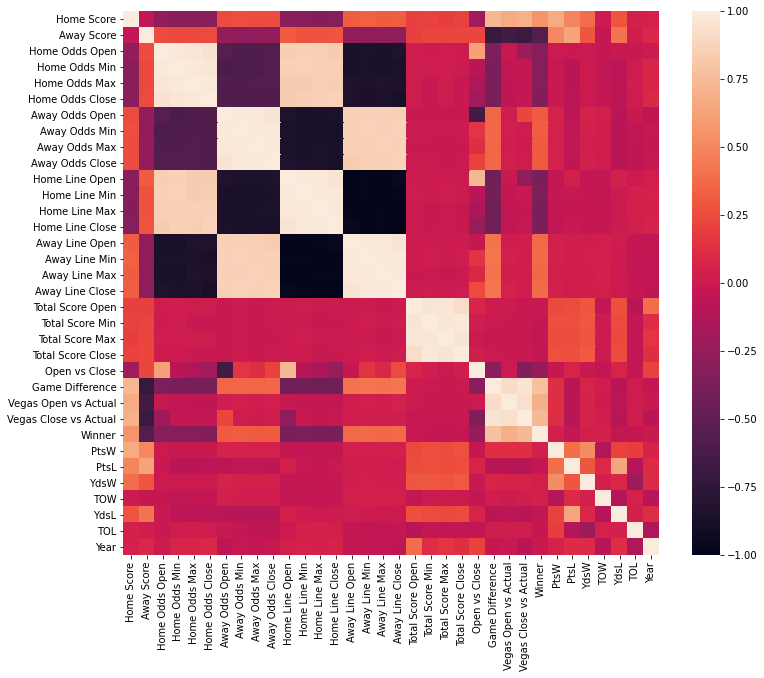

In [646]:

plt.subplots(figsize=(12,10))
sns.heatmap(result.corr());

In [647]:
DateS_Specific = pd.DataFrame()
Date_Specific = result[['Week', 'Day', 'Time']]
Date_Specific.head()

,Week,Day,Time
0,17,Sun,08:20:00
1,17,Sun,04:25:00
2,17,Sun,04:25:00
3,17,Sun,04:25:00
4,17,Sun,04:25:00


Cool now that we have a week to week full breakdown, let's introduce some macro statistics from the season to see, as a whole, which teams were undervalued (traditionally, those that cover the spreads) and overvalued (those that don't) for the year of 2020.

# Offensive Statistics

In [648]:
def O(url):
    df = pd.read_html(url, header=1)[0]
    df = pd.DataFrame(df)

    df = df.set_index('Tm')
    df = df.drop(['G', 'PF', 'Rk'], axis = 1)
    df = df.apply(pd.to_numeric, errors = 'ignore')
    df = df.iloc[:32]
    
    df = df.rename(columns={"Yds.1": "Pass_Yds", "Yds.2": "Run_Yds","TD": "P_TD", "TD.1": "R_TD",\
                            "1stD.2": "R_1stD", "1stD.1": "P_1stD", "Y/R" : "Run/A", 'NY/A':'Pass/A',\
                            'Yds.3':'Pen_Yds', '1stPy': 'Pen_1st', "Att" : "Pass_Att", "Att.1" : "Run_Att",\
                            'Y/P' : 'Y/Ply'})
    return df

In [649]:

Big_O = pd.DataFrame()
for x in years:
    print(x)
    url = 'https://widgets.sports-reference.com/wg.fcgi?css=1&site=pfr&url=%2Fyears%2F'+ str(x) + '%2F%3Fsr%26utm_source%3Ddirect%26utm_medium%3DShare%26utm_campaign%3DShareTool&div=div_team_stats'
    add =  O(url)
    add['Year'] = x
    Big_O = Big_O.append(add)
    
    
    
    
    
#url ="https://widgets.sports-reference.com/wg.fcgi?css=1&site=pfr&url=%2Fyears%2F2019%2F%3Fsr%26utm_source%3Ddirect%26utm_medium%3DShare%26utm_campaign%3DShareTool&div=div_team_stats"


2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [650]:
Big_O[Big_O['Year'] == 2006]

,Yds,Ply,Y/Ply,TO,FL,1stD,Cmp,Pass_Att,Pass_Yds,P_TD,...,R_TD,Y/A,R_1stD,Pen,Pen_Yds,Pen_1st,Sc%,TO%,EXP,Year
Tm,,,,,,,,,,,,,,,,,,,,,
San Diego Chargers,5840.0,1016.0,5.7,15.0,6.0,321.0,287.0,466.0,3262.0,24.0,...,32.0,4.9,137.0,90.0,791.0,15.0,43.2,6.8,-0.85,2006
Chicago Bears,5199.0,1042.0,5.0,36.0,14.0,300.0,282.0,514.0,3281.0,24.0,...,14.0,3.8,103.0,112.0,923.0,36.0,34.8,15.9,-133.82,2006
Indianapolis Colts,6070.0,1011.0,6.0,19.0,10.0,376.0,362.0,557.0,4308.0,31.0,...,17.0,4.0,112.0,86.0,718.0,23.0,47.4,10.9,26.73,2006
Dallas Cowboys,5772.0,1015.0,5.7,30.0,9.0,336.0,310.0,506.0,3836.0,26.0,...,21.0,4.1,107.0,100.0,939.0,32.0,38.1,15.3,-35.15,2006
New Orleans Saints,6264.0,1075.0,5.8,23.0,10.0,330.0,372.0,580.0,4503.0,27.0,...,19.0,3.7,99.0,79.0,597.0,24.0,36.8,12.1,-100.41,2006
Philadelphia Eagles,6103.0,988.0,6.2,24.0,15.0,312.0,323.0,544.0,4119.0,31.0,...,13.0,4.8,106.0,112.0,983.0,17.0,33.9,11.5,-32.03,2006
New England Patriots,5369.0,1055.0,5.1,27.0,15.0,330.0,326.0,527.0,3400.0,25.0,...,20.0,3.9,121.0,98.0,940.0,28.0,34.4,13.8,-76.38,2006
Cincinnati Bengals,5462.0,994.0,5.5,24.0,11.0,313.0,327.0,523.0,3833.0,28.0,...,14.0,3.7,88.0,92.0,717.0,25.0,35.6,12.2,-89.47,2006
Jacksonville Jaguars,5423.0,989.0,5.5,23.0,9.0,293.0,266.0,446.0,2882.0,17.0,...,23.0,5.0,127.0,97.0,810.0,19.0,35.1,11.2,-80.60,2006


In [651]:
datapath = '/Users/alecnigh/Documents/DataScienceGuidedCapstone-master/Final_Project/Capstone_project/'
Big_O.to_csv(datapath + 'Offense.csv')

Offense looks great, now let's move to the Defense.

# Defensive Statistics

Function to grab our statistics and to clean up the data.

In [652]:
def D_06_17(url):
    html = urlopen(url)
    stats_page = BeautifulSoup(html)
    
# Collect table headers

    column_headers = stats_page.findAll('tr')[1]
    column_headers = [i.getText() for i in column_headers.findAll('th')]

# Collect table rows

    rows = stats_page.findAll('tr')[1:]
    
# Get stats from each row
    
    D_stats = []
    for i in range(len(rows)):
        D_stats.append([col.getText() for col in rows[i].findAll('td')])
    
# Combine those into a Dataframe for manipulation    
    
    data = pd.DataFrame(D_stats[1:], columns=column_headers[1:])
    
    df= []
    
#Clean up data 
    
    for x in data:
        if data['Tm'].dtype == 'str':
            df.append(x)
            
        
    data = data.set_index('Tm')

    data = data.iloc[:32]
    
    data['Total_Yds'] = data.iloc[:,2]

    data['Pass_1st'] = data.iloc[:,7]
    data['Pass_Att'] = data.iloc[:,9]
    data['Pass_Yds'] = data.iloc[:,10]
    data['Pass_TDs'] = data.iloc[:,11]

    data['Rush_1st'] = data.iloc[:,14]
    data['Rush_Att'] = data.iloc[:,15]
    data['Rush_Yds'] = data.iloc[:,16]
    data['Rush_TDs'] = data.iloc[:,17]

    data['Pen_1st'] = data.iloc[:,18]
    data['Pen_Yds'] = data.iloc[:,20]
    
    data = data.drop(['Yds', '1stD','Att', 'TD'], axis = 1)
    
#Clearing the same name's but couldn't use rename
    
    data = data.apply(pd.to_numeric, errors = 'ignore')
    
    data.rename(columns=lambda x: x + '_D', inplace=True)
    
    return data

In [653]:
url = 'https://www.pro-football-reference.com/years/'
Big_D = pd.DataFrame()
for x in years:
    print(x)
    url = 'https://www.pro-football-reference.com/years/'+ str(x) + '/opp.htm'
    z =  D_06_17(url)
    z['Year'] = x
    Big_D = Big_D.append(z)


2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [654]:
Big_D[Big_D['Year'] == 2006]

,G_D,PF_D,Ply_D,Y/P_D,TO_D,FL_D,Cmp_D,Int_D,NY/A_D,Y/A_D,...,Pass_Att_D,Pass_Yds_D,Pass_TDs_D,Rush_1st_D,Rush_Att_D,Rush_Yds_D,Rush_TDs_D,Pen_1st_D,Pen_Yds_D,Year
Tm,,,,,,,,,,,,,,,,,,,,,
Baltimore Ravens,16,201,936,4.5,40,12,279,28,5.3,3.3,...,509,3011,16,151,367,1214,5,3.3,79,2006
New England Patriots,16,237,950,5.0,35,13,294,22,5.7,3.9,...,518,3203,10,164,388,1507,11,3.9,102,2006
Chicago Bears,16,255,1023,4.6,44,20,328,24,5.0,4.0,...,581,3116,18,159,402,1590,7,4.0,132,2006
Jacksonville Jaguars,16,274,978,4.6,24,4,294,20,5.5,3.5,...,523,3078,12,143,420,1460,14,3.5,80,2006
Miami Dolphins,16,283,1005,4.6,27,19,279,8,5.5,3.5,...,497,3007,22,166,461,1618,7,3.5,91,2006
New York Jets,16,295,1020,5.2,25,9,316,16,5.7,4.6,...,532,3222,19,181,453,2084,14,4.6,105,2006
San Diego Chargers,16,303,985,4.9,28,12,307,16,5.4,4.2,...,538,3212,19,178,386,1613,13,4.2,87,2006
Carolina Panthers,16,305,990,4.8,22,8,291,14,5.5,3.9,...,500,3000,22,149,449,1737,10,3.9,89,2006
Denver Broncos,16,305,1020,5.1,30,13,327,17,5.9,4.1,...,538,3407,13,183,446,1813,13,4.1,97,2006


In [655]:
Big_D.head()

,G_D,PF_D,Ply_D,Y/P_D,TO_D,FL_D,Cmp_D,Int_D,NY/A_D,Y/A_D,...,Pass_Att_D,Pass_Yds_D,Pass_TDs_D,Rush_1st_D,Rush_Att_D,Rush_Yds_D,Rush_TDs_D,Pen_1st_D,Pen_Yds_D,Year
Tm,,,,,,,,,,,,,,,,,,,,,
Baltimore Ravens,16,201,936,4.5,40,12,279,28,5.3,3.3,...,509,3011,16,151,367,1214,5,3.3,79,2006
New England Patriots,16,237,950,5.0,35,13,294,22,5.7,3.9,...,518,3203,10,164,388,1507,11,3.9,102,2006
Chicago Bears,16,255,1023,4.6,44,20,328,24,5.0,4.0,...,581,3116,18,159,402,1590,7,4.0,132,2006
Jacksonville Jaguars,16,274,978,4.6,24,4,294,20,5.5,3.5,...,523,3078,12,143,420,1460,14,3.5,80,2006
Miami Dolphins,16,283,1005,4.6,27,19,279,8,5.5,3.5,...,497,3007,22,166,461,1618,7,3.5,91,2006


In [656]:
datapath = '/Users/alecnigh/Documents/DataScienceGuidedCapstone-master/Final_Project/Capstone_project/'
Big_D.to_csv(datapath + 'Big_D.csv')

# Combining Conferences into a Signal Table

Below is our function that cleans both conference tables and combines them.

In [657]:
def Team_Overall(AFC, NFC):    

# Both conferences which we will read into Jupiter, clean, and combime them using concat
    
    df = pd.read_html(AFC)[0]
    df2 = pd.read_html(NFC)[1]
    
# Deleting the conference columns as they mess with our data
    
    AFC = df[(df['PA'] != 'AFC East') & (df['PA'] != 'AFC North') & (df['PA'] != 'AFC South') & (df['PA'] != 'AFC West')] 
    NFC = df2[(df2['PA'] != 'NFC East') & (df2['PA'] != 'NFC North') & (df2['PA'] != 'NFC South') & (df2['PA'] != 'NFC West')] 

# Combine the cleaned dataframes
    
    NFL = pd.concat([AFC, NFC], axis=0)
    
# Reset the index    

    NFL = NFL.reset_index(drop=True)
    
# Setting to floats and replace '*' and '+'

    NFL = NFL.apply(pd.to_numeric, errors = 'ignore')
    NFL = NFL.replace('\*','',regex=True)
    NFL = NFL.replace('\+','',regex=True)
    
    NFL = NFL.set_index('Tm')

    return NFL

Now let's loop them together.

In [658]:
NFL = pd.DataFrame()

for x in years:
    AFC = 'https://www.pro-football-reference.com/years/'+ str(x)
    NFC = 'https://www.pro-football-reference.com/years/'+ str(x)
    w =  Team_Overall(AFC, NFC)
    w['Year'] = x
    NFL = NFL.append(w)
    
print("Done!")

Done!


In [659]:
NFL.drop('T', axis=1, inplace=True)

In [660]:
NFL[NFL.Year == 2006]

,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Year
Tm,,,,,,,,,,,,
New England Patriots,12,4,0.750,385,237,148,9.3,1.0,10.2,4.3,5.9,2006
New York Jets,10,6,0.625,316,295,21,1.3,0.7,2.0,0.4,1.7,2006
Buffalo Bills,7,9,0.438,300,311,-11,-0.7,2.9,2.2,-0.2,2.4,2006
Miami Dolphins,6,10,0.375,260,283,-23,-1.4,2.1,0.7,-3.3,4.0,2006
Baltimore Ravens,13,3,0.813,353,201,152,9.5,-0.2,9.3,1.5,7.8,2006
Cincinnati Bengals,8,8,0.500,373,331,42,2.6,1.5,4.1,4.0,0.0,2006
Pittsburgh Steelers,8,8,0.500,353,315,38,2.4,1.0,3.4,3.0,0.4,2006
Cleveland Browns,4,12,0.250,238,356,-118,-7.4,1.5,-5.8,-4.5,-1.3,2006
Indianapolis Colts,12,4,0.750,427,360,67,4.2,1.7,5.9,6.9,-1.1,2006


In [661]:
datapath = '/Users/alecnigh/Documents/DataScienceGuidedCapstone-master/Final_Project/Capstone_project/'
NFL.to_csv(datapath + 'Full_NFL.csv')

In [662]:
Big_O.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, San Diego Chargers to New York Jets
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Yds       480 non-null    float64
 1   Ply       480 non-null    float64
 2   Y/Ply     480 non-null    float64
 3   TO        480 non-null    float64
 4   FL        480 non-null    float64
 5   1stD      480 non-null    float64
 6   Cmp       480 non-null    float64
 7   Pass_Att  480 non-null    float64
 8   Pass_Yds  480 non-null    float64
 9   P_TD      480 non-null    float64
 10  Int       480 non-null    float64
 11  Pass/A    480 non-null    float64
 12  P_1stD    480 non-null    float64
 13  Run_Att   480 non-null    float64
 14  Run_Yds   480 non-null    float64
 15  R_TD      480 non-null    float64
 16  Y/A       480 non-null    float64
 17  R_1stD    480 non-null    float64
 18  Pen       480 non-null    float64
 19  Pen_Yds   480 non-null    float64
 20  Pen_1st   

In [678]:
Big_D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, Baltimore Ravens to Detroit Lions
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   G_D          480 non-null    int64  
 1   PF_D         480 non-null    int64  
 2   Ply_D        480 non-null    int64  
 3   Y/P_D        480 non-null    float64
 4   TO_D         480 non-null    int64  
 5   FL_D         480 non-null    int64  
 6   Cmp_D        480 non-null    int64  
 7   Int_D        480 non-null    int64  
 8   NY/A_D       480 non-null    float64
 9   Y/A_D        480 non-null    float64
 10  Pen_D        480 non-null    int64  
 11  1stPy_D      480 non-null    int64  
 12  Sc%_D        480 non-null    float64
 13  TO%_D        480 non-null    float64
 14  EXP_D        480 non-null    float64
 15  Total_Yds_D  480 non-null    int64  
 16  Pass_1st_D   480 non-null    int64  
 17  Pass_Att_D   480 non-null    int64  
 18  Pass_Yds_D   480 non-null    i

And now to combine these.

In [679]:
Big_O.merge(Big_D, left_on = ['Tm','Year'], right_on=['Tm','Year']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, San Diego Chargers to New York Jets
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Yds          480 non-null    float64
 1   Ply          480 non-null    float64
 2   Y/Ply        480 non-null    float64
 3   TO           480 non-null    float64
 4   FL           480 non-null    float64
 5   1stD         480 non-null    float64
 6   Cmp          480 non-null    float64
 7   Pass_Att     480 non-null    float64
 8   Pass_Yds     480 non-null    float64
 9   P_TD         480 non-null    float64
 10  Int          480 non-null    float64
 11  Pass/A       480 non-null    float64
 12  P_1stD       480 non-null    float64
 13  Run_Att      480 non-null    float64
 14  Run_Yds      480 non-null    float64
 15  R_TD         480 non-null    float64
 16  Y/A          480 non-null    float64
 17  R_1stD       480 non-null    float64
 18  Pen          480 non-null   

In [680]:
combined[(combined['Year'] == 2008) & (combined.index == 'Tampa Bay Buccaneers')]

,Yds,Ply,Y/Ply,TO,FL,1stD,Cmp,Pass_Att,Pass_Yds,P_TD,...,Pass_1st_D,Pass_Att_D,Pass_Yds_D,Pass_TDs_D,Rush_1st_D,Rush_Att_D,Rush_Yds_D,Rush_TDs_D,Pen_1st_D,Pen_Yds_D
Tm,,,,,,,,,,,,,,,,,,,,,
Tampa Bay Buccaneers,5456.0,1045.0,5.2,26.0,13.0,298.0,355.0,562.0,3619.0,18.0,...,259,475,2997,23,153,441,1901,8,4.3,88


In [681]:
combined[combined['Year'] == 2006]

,Yds,Ply,Y/Ply,TO,FL,1stD,Cmp,Pass_Att,Pass_Yds,P_TD,...,Pass_1st_D,Pass_Att_D,Pass_Yds_D,Pass_TDs_D,Rush_1st_D,Rush_Att_D,Rush_Yds_D,Rush_TDs_D,Pen_1st_D,Pen_Yds_D
Tm,,,,,,,,,,,,,,,,,,,,,
San Diego Chargers,5840.0,1016.0,5.7,15.0,6.0,321.0,287.0,466.0,3262.0,24.0,...,285,538,3212,19,178,386,1613,13,4.2,87
Chicago Bears,5199.0,1042.0,5.0,36.0,14.0,300.0,282.0,514.0,3281.0,24.0,...,258,581,3116,18,159,402,1590,7,4.0,132
Indianapolis Colts,6070.0,1011.0,6.0,19.0,10.0,376.0,362.0,557.0,4308.0,31.0,...,325,415,2548,16,150,519,2768,20,5.3,86
Dallas Cowboys,5772.0,1015.0,5.7,30.0,9.0,336.0,310.0,506.0,3836.0,26.0,...,294,511,3506,25,179,429,1659,12,3.9,93
New Orleans Saints,6264.0,1075.0,5.8,23.0,10.0,330.0,372.0,580.0,4503.0,27.0,...,262,474,2854,26,148,418,2063,10,4.9,89
Philadelphia Eagles,6103.0,988.0,6.2,24.0,15.0,312.0,323.0,544.0,4119.0,31.0,...,314,525,3067,17,154,489,2182,12,4.5,96
New England Patriots,5369.0,1055.0,5.1,27.0,15.0,330.0,326.0,527.0,3400.0,25.0,...,264,518,3203,10,164,388,1507,11,3.9,102
Cincinnati Bengals,5462.0,994.0,5.5,24.0,11.0,313.0,327.0,523.0,3833.0,28.0,...,337,555,3818,24,206,448,1863,15,4.2,97
Jacksonville Jaguars,5423.0,989.0,5.5,23.0,9.0,293.0,266.0,446.0,2882.0,17.0,...,259,523,3078,12,143,420,1460,14,3.5,80


In [682]:
combined.index

Index(['San Diego Chargers', 'Chicago Bears', 'Indianapolis Colts',
       'Dallas Cowboys', 'New Orleans Saints', 'Philadelphia Eagles',
       'New England Patriots', 'Cincinnati Bengals', 'Jacksonville Jaguars',
       'St. Louis Rams',
       ...
       'Chicago Bears', 'Carolina Panthers', 'Washington Football Team',
       'Philadelphia Eagles', 'New England Patriots', 'Denver Broncos',
       'Cincinnati Bengals', 'Jacksonville Jaguars', 'New York Giants',
       'New York Jets'],
      dtype='object', name='Tm', length=480)

In [683]:
final = pd.DataFrame()


combined = Big_O.merge(Big_D, left_on = ['Tm','Year'], right_on=['Tm','Year'])
last = NFL.merge(combined, right_on = ['Tm', 'Year'], left_on=['Tm', 'Year'])
final = final.append(last)
final.head()

,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,...,Pass_1st_D,Pass_Att_D,Pass_Yds_D,Pass_TDs_D,Rush_1st_D,Rush_Att_D,Rush_Yds_D,Rush_TDs_D,Pen_1st_D,Pen_Yds_D
Tm,,,,,,,,,,,,,,,,,,,,,
New England Patriots,12,4,0.750,385,237,148,9.3,1.0,10.2,4.3,...,264,518,3203,10,164,388,1507,11,3.9,102
New York Jets,10,6,0.625,316,295,21,1.3,0.7,2.0,0.4,...,312,532,3222,19,181,453,2084,14,4.6,105
Buffalo Bills,7,9,0.438,300,311,-11,-0.7,2.9,2.2,-0.2,...,298,513,3019,18,168,476,2254,14,4.7,90
Miami Dolphins,6,10,0.375,260,283,-23,-1.4,2.1,0.7,-3.3,...,267,497,3007,22,166,461,1618,7,3.5,91
Baltimore Ravens,13,3,0.813,353,201,152,9.5,-0.2,9.3,1.5,...,236,509,3011,16,151,367,1214,5,3.3,79


In [684]:
final.columns

Index(['W', 'L', 'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS', 'SRS', 'OSRS', 'DSRS',
       'Year', 'Yds', 'Ply', 'Y/Ply', 'TO', 'FL', '1stD', 'Cmp', 'Pass_Att',
       'Pass_Yds', 'P_TD', 'Int', 'Pass/A', 'P_1stD', 'Run_Att', 'Run_Yds',
       'R_TD', 'Y/A', 'R_1stD', 'Pen', 'Pen_Yds', 'Pen_1st', 'Sc%', 'TO%',
       'EXP', 'G_D', 'PF_D', 'Ply_D', 'Y/P_D', 'TO_D', 'FL_D', 'Cmp_D',
       'Int_D', 'NY/A_D', 'Y/A_D', 'Pen_D', '1stPy_D', 'Sc%_D', 'TO%_D',
       'EXP_D', 'Total_Yds_D', 'Pass_1st_D', 'Pass_Att_D', 'Pass_Yds_D',
       'Pass_TDs_D', 'Rush_1st_D', 'Rush_Att_D', 'Rush_Yds_D', 'Rush_TDs_D',
       'Pen_1st_D', 'Pen_Yds_D'],
      dtype='object')

In [685]:
datapath = '/Users/alecnigh/Documents/DataScienceGuidedCapstone-master/Final_Project/Capstone_project/'
final.to_csv(datapath + 'Complete_Results_2006_2020.csv')

In [686]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, New England Patriots to San Francisco 49ers
Data columns (total 62 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   W            480 non-null    int64  
 1   L            480 non-null    int64  
 2   W-L%         480 non-null    float64
 3   PF           480 non-null    int64  
 4   PA           480 non-null    int64  
 5   PD           480 non-null    int64  
 6   MoV          480 non-null    float64
 7   SoS          480 non-null    float64
 8   SRS          480 non-null    float64
 9   OSRS         480 non-null    float64
 10  DSRS         480 non-null    float64
 11  Year         480 non-null    int64  
 12  Yds          480 non-null    float64
 13  Ply          480 non-null    float64
 14  Y/Ply        480 non-null    float64
 15  TO           480 non-null    float64
 16  FL           480 non-null    float64
 17  1stD         480 non-null    float64
 18  Cmp          480 non

In [687]:
final.iloc[:, 1].T

Tm
New England Patriots     4
New York Jets            6
Buffalo Bills            9
Miami Dolphins          10
Baltimore Ravens         3
                        ..
Atlanta Falcons         12
Seattle Seahawks         4
Los Angeles Rams         6
Arizona Cardinals        8
San Francisco 49ers     10
Name: L, Length: 480, dtype: int64

In [688]:
final.corr().T

,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,...,Pass_1st_D,Pass_Att_D,Pass_Yds_D,Pass_TDs_D,Rush_1st_D,Rush_Att_D,Rush_Yds_D,Rush_TDs_D,Pen_1st_D,Pen_Yds_D
W,1.000000,-0.997944,0.999494,0.750466,-0.671318,0.914776,0.914578,-0.191244,0.878350,0.752619,...,-0.304063,0.366001,-0.135978,-0.324187,-0.054848,-0.649623,-0.486588,-0.450285,-0.127190,0.024478
L,-0.997944,1.000000,-0.999476,-0.752407,0.670051,-0.915421,-0.915209,0.189695,-0.879428,-0.753157,...,0.298915,-0.371682,0.132573,0.323490,0.049796,0.649844,0.487562,0.448130,0.128198,-0.028992
W-L%,0.999494,-0.999476,1.000000,0.751794,-0.671015,0.915541,0.915335,-0.190602,0.879303,0.753235,...,-0.301637,0.369059,-0.134262,-0.323941,-0.052292,-0.650116,-0.487374,-0.449457,-0.127776,0.026790
PF,0.750466,-0.752407,0.751794,1.000000,-0.213340,0.828711,0.828670,-0.221646,0.783112,0.950257,...,0.063334,0.438037,0.191852,0.060779,0.244257,-0.563493,-0.318486,-0.198664,0.065976,0.053495
PA,-0.671318,0.670051,-0.671015,-0.213340,1.000000,-0.723589,-0.723621,0.055941,-0.719828,-0.287320,...,0.694356,-0.086911,0.531718,0.686879,0.451113,0.502824,0.551868,0.648270,0.391936,0.042195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rush_Att_D,-0.649623,0.649844,-0.650116,-0.563493,0.502824,-0.686156,-0.686337,0.130807,-0.662210,-0.532094,...,0.357658,-0.501942,-0.092093,0.091027,-0.110957,1.000000,0.822569,0.544379,0.323080,-0.124660
Rush_Yds_D,-0.486588,0.487562,-0.487374,-0.318486,0.551868,-0.541155,-0.541598,0.127572,-0.515979,-0.311767,...,0.489426,-0.438137,0.011062,0.168934,-0.020085,0.822569,1.000000,0.635636,0.798681,-0.087222
Rush_TDs_D,-0.450285,0.448130,-0.449457,-0.198664,0.648270,-0.511726,-0.511879,0.095505,-0.494006,-0.228855,...,0.515867,-0.261925,0.182649,0.048752,0.125825,0.544379,0.635636,1.000000,0.475810,-0.132350
Pen_1st_D,-0.127190,0.128198,-0.127776,0.065976,0.391936,-0.177915,-0.178472,0.065958,-0.163467,0.042803,...,0.447548,-0.195178,0.125116,0.196736,0.092232,0.323080,0.798681,0.475810,1.000000,-0.000929


In [689]:
final.corr(method='spearman')

,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,...,Pass_1st_D,Pass_Att_D,Pass_Yds_D,Pass_TDs_D,Rush_1st_D,Rush_Att_D,Rush_Yds_D,Rush_TDs_D,Pen_1st_D,Pen_Yds_D
W,1.000000,-0.997629,0.999397,0.736234,-0.680358,0.915024,0.914780,-0.173824,0.878530,0.743838,...,-0.317574,0.359658,-0.151623,-0.307579,-0.079971,-0.645692,-0.472016,-0.430766,-0.128106,0.019625
L,-0.997629,1.000000,-0.999403,-0.739211,0.678813,-0.915741,-0.915465,0.172783,-0.879707,-0.744507,...,0.312080,-0.364241,0.149356,0.309061,0.075826,0.644831,0.471831,0.425441,0.127821,-0.023451
W-L%,0.999397,-0.999403,1.000000,0.737928,-0.680002,0.915790,0.915531,-0.173345,0.879496,0.744364,...,-0.315184,0.361857,-0.150825,-0.308912,-0.078257,-0.645453,-0.472099,-0.428004,-0.128065,0.021535
PF,0.736234,-0.739211,0.737928,1.000000,-0.238072,0.818333,0.818196,-0.210589,0.770755,0.941800,...,0.023251,0.398401,0.148949,0.059193,0.195630,-0.546932,-0.308929,-0.190099,0.052334,0.047619
PA,-0.680358,0.678813,-0.680002,-0.238072,1.000000,-0.729048,-0.729197,0.045416,-0.722249,-0.305234,...,0.674929,-0.102643,0.517216,0.660632,0.433576,0.506320,0.528740,0.616528,0.359309,0.039049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rush_Att_D,-0.645692,0.644831,-0.645453,-0.546932,0.506320,-0.682417,-0.682426,0.083692,-0.662571,-0.526733,...,0.371774,-0.455000,-0.055207,0.092485,-0.078134,1.000000,0.794213,0.526192,0.296030,-0.094843
Rush_Yds_D,-0.472016,0.471831,-0.472099,-0.308929,0.528740,-0.529419,-0.529950,0.092779,-0.508353,-0.314000,...,0.488018,-0.376028,0.047627,0.153567,0.013973,0.794213,1.000000,0.590217,0.789868,-0.045821
Rush_TDs_D,-0.430766,0.425441,-0.428004,-0.190099,0.616528,-0.483146,-0.483561,0.073053,-0.466355,-0.218257,...,0.501669,-0.227186,0.185249,0.030082,0.121584,0.526192,0.590217,1.000000,0.434909,-0.105164
Pen_1st_D,-0.128106,0.127821,-0.128065,0.052334,0.359309,-0.178853,-0.179716,0.063432,-0.165244,0.024889,...,0.408183,-0.177569,0.126453,0.170323,0.082336,0.296030,0.789868,0.434909,1.000000,-0.001245


In [690]:
np.corrcoef(final.loc[:,'W':].values.T)

/Users/alecnigh/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/alecnigh/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[ 1.00000000e+00, -9.97944065e-01,  9.99494230e-01, ...,
        -4.50284550e-01, -1.27189683e-01,  2.44782627e-02],
       [-9.97944065e-01,  1.00000000e+00, -9.99475816e-01, ...,
         4.48129628e-01,  1.28197604e-01, -2.89923639e-02],
       [ 9.99494230e-01, -9.99475816e-01,  1.00000000e+00, ...,
        -4.49456945e-01, -1.27775877e-01,  2.67901501e-02],
       ...,
       [-4.50284550e-01,  4.48129628e-01, -4.49456945e-01, ...,
         1.00000000e+00,  4.75810500e-01, -1.32349901e-01],
       [-1.27189683e-01,  1.28197604e-01, -1.27775877e-01, ...,
         4.75810500e-01,  1.00000000e+00, -9.29023971e-04],
       [ 2.44782627e-02, -2.89923639e-02,  2.67901501e-02, ...,
        -1.32349901e-01, -9.29023971e-04,  1.00000000e+00]])

A list of correlations from most to least! This will help us decide which elements to ad to our week by week dataset.

In [691]:
final.corr().unstack().sort_values().drop_duplicates()


L          W-L%    -0.999476
W          L       -0.997944
DSRS       PF_D    -0.928747
PD         L       -0.915421
L          MoV     -0.915209
                      ...   
PD         SRS      0.965630
W-L%       W        0.999494
PD         MoV      0.999989
Pen_Yds_D  Pen_D    1.000000
W          G_D           NaN
Length: 1655, dtype: float64

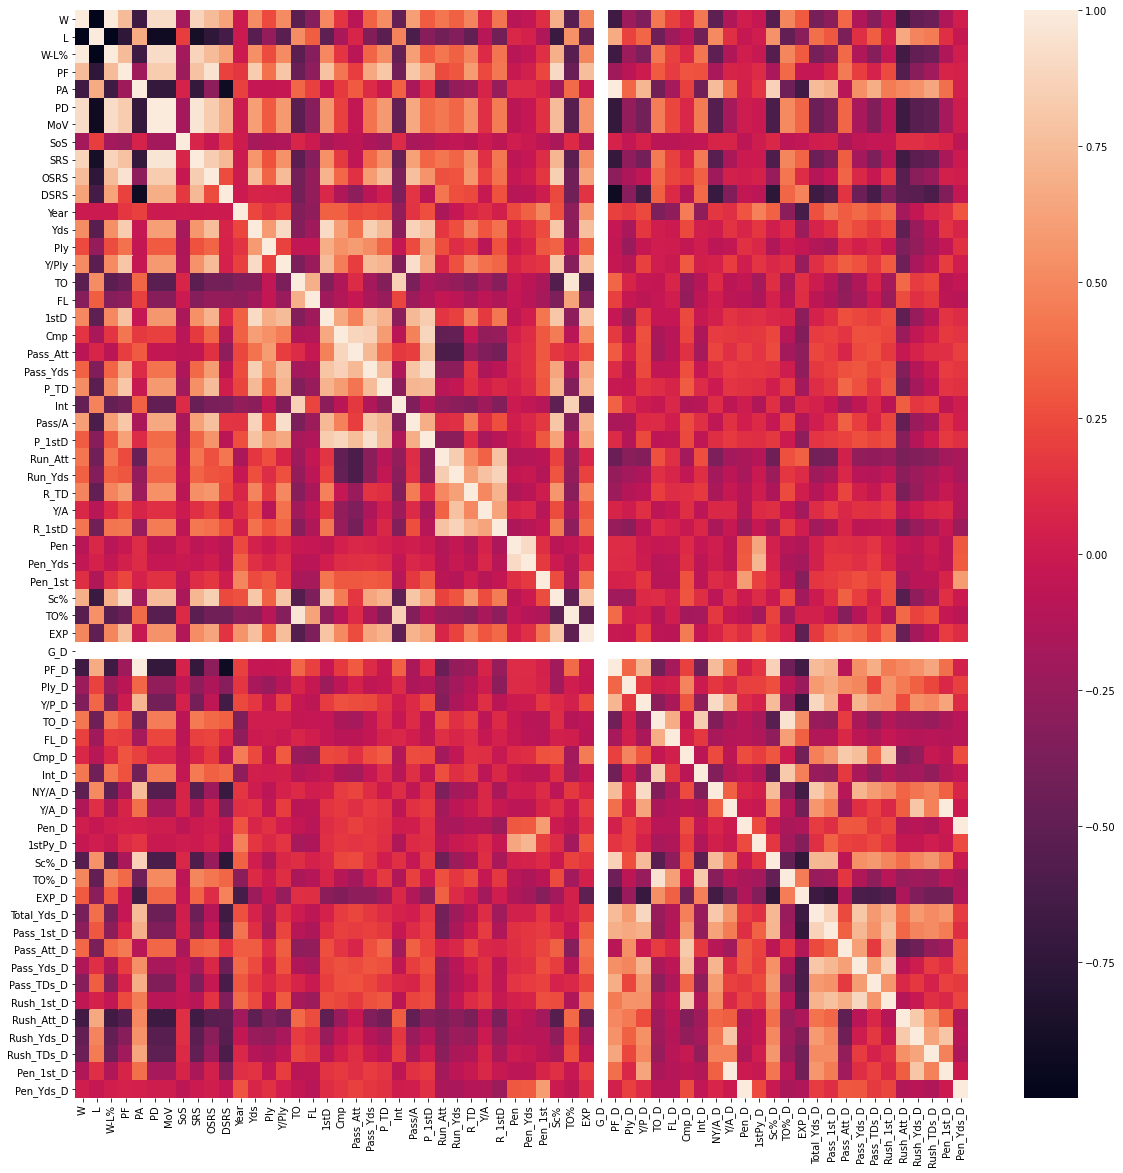

In [692]:
plt.subplots(figsize=(20,20))
sns.heatmap(final.corr());

In [693]:
#Selecting strong correlation pairs (magnitude greater than 0.5)

strong_pairs = final[abs(final) > 0.5]


At quick glance, it looks like offense is much more correlated than defense when it comes to winning. Intuitively, that makes perfect sense - this game is all about winning and the winner is the one that scores more points. 

Another interesting component is the high negative correlation between the % of scoring drives (Sc%) that end in scores for a defense. 

Let's create a full list of the highly correlated ones, throw out the obvious (there's a perfect positive correlation between penalties and penalty yards) and then use those stats to target some statistics to merge into our week-to-week and total database. 

In [694]:
final.corr().unstack().sort_values().drop_duplicates().head(50)


#And state_summary_newind.resorts_per_state.sort_values(ascending=False).head()

L            W-L%          -0.999476
W            L             -0.997944
DSRS         PF_D          -0.928747
PD           L             -0.915421
L            MoV           -0.915209
             SRS           -0.879428
Sc%_D        DSRS          -0.763976
L            OSRS          -0.753157
PF           L             -0.752407
EXP_D        Sc%_D         -0.740868
Pass_1st_D   EXP_D         -0.727965
MoV          PA            -0.723621
PF_D         PD            -0.723589
PA           SRS           -0.719828
EXP_D        Y/P_D         -0.707178
NY/A_D       DSRS          -0.698108
Sc%          L             -0.691501
EXP_D        Total_Yds_D   -0.686685
MoV          Rush_Att_D    -0.686337
Rush_Att_D   PD            -0.686156
PA           W             -0.671318
PF_D         W-L%          -0.671015
Total_Yds_D  DSRS          -0.670302
SRS          Rush_Att_D    -0.662210
EXP_D        PA            -0.660707
W-L%         Rush_Att_D    -0.650116
Rush_Att_D   W             -0.649623
Y

For these stats, we keep the principle that not all correlation is causation. This is especially true when we see advanced stats (like DSRS or EXP) that take the raw stats to make their calculations.

Some main takeaways: 
    
    1. Sc%_D , DRSR - This negative correlation (-0.763976) shows the higher their percentage of stopping an offense, the better their defense would be compared to offense. Seems obvious but this shows there isn't much of a difference between giving up field goals vs touchdowns.
    2. Pass_1st_D,  EXP_D  -  This shows how many passing first downs an opposing team gets (or which a team gives up) is somewhat predictive in the Expected points given up by a defense (-0.727965).
    3.Sc%, L - The opposing team that turns the ball over will lose (-0.691501). Take care of the ball and you should do well. Is this predictive or just random events?
    4. SRS, Rush_Att_D - Here's an intersting one. The amount of rushing attempts a defense gives up correlates negatviely to the SRS which is a combination of Strength of Scheudule, Offensive and Defensive efficiency, and margin of victory. This seems to suggest that if a team gives up points in the later half of a game when it's already decided, that final number can be skewed. Does Vegas take this into account when creating lines?  On the note of rushing attempts, hard to make a true assessment between correlation and causation. Can the losing team simply not stop the run, or do winning teams traditionally run the ball more frequently? -0.662210
    5. EXP_D, Rush_1st_D - Here we got another 1st down correlation. It intuitively makes sense that a team that gets more first downs has more success (or more specifically, a lower Expected Defensive Points). -0.564182
    6. W-L%, Sc%_D  -0.553075 - 
    7. NY/A_D, MoV - And finally, another interesting negative correlation. Here, the yards per pass att a defense gives up is negatively correlation to the margin of victory. Apparently, even more so than the points scored themselves. -0.548961
    

In [695]:
final.corr().unstack().sort_values().drop_duplicates().tail(110)


P_TD       EXP      0.708322
Pass/A     EXP      0.709939
P_TD       Sc%      0.710061
1stD       P_TD     0.710880
R_1stD     R_TD     0.710937
                      ...   
PD         SRS      0.965630
W-L%       W        0.999494
PD         MoV      0.999989
Pen_Yds_D  Pen_D    1.000000
W          G_D           NaN
Length: 110, dtype: float64

Now let's look at the positive correlations to see how our statistics impact wins or loses.

    1. P_1stD,  Pass_Yds - Here, we have a super strong correlation (0.942370!!!). Looks like those that gain more passing first downs also have more passing yards. Now that seems very self explanatory, but these 2 are so strongly correlated that I think it's worth noting. 
    2. Pass/A,   Y/Ply - Again, passing the ball looks like it's a more efficient way to move the ball. We know this. It begs the question: "why do teams run the ball at all?" 0.931491
    3. Total_Yds_D,  Y/P_D 0.893896 - Another stat pointing to the importance of efficiency in the macro sense of the game. A Defense giving up higher totals for yards will also be giving up higher years per pass. 
    4. Yds,   Pass/A  0.871956 - Very similar to defense, showing a strong correlation between total yards and efficiency on offense.
    5. Sc%,    EXP   0.808221 - Another efficiency correlation - the percentage of scores by the offense is strongly related to the Expected Points from that offense.
    6. 1stD,    EXP   0.795044 -  No surprise here. More first downs means more Expected points. 
    7. 1stD,    Pass_Yds  0.793043 - 1stD in general ios strongly correlating with... Pass_yds. Here is a smoking gun that shows 2 unintuitively (although, not altogether different) variables that are strongly correlated.
    1stD       Y/Ply       0.753215
    OSRS       W-L%        0.753235
    NY/A_D     Sc%_D       0.753784
    Pass_Yds   Y/Ply       0.756084
    W          OSRS      0.752619
    MoV        Sc%       0.751587
    Sc%_D       Total_Yds_D 0.733202 - scoring percentage and total yards allowed go hand in hand. 
    1stD       P_TD     0.710880
    Major takeaways:
    
        - Passing stats seem to be very postively correlated in general. 

In [696]:
new = []
header = final.columns
for x in final:
    print(x)
    x = final.corr()
    new.append(x)
print(new)

W
L
W-L%
PF
PA
PD
MoV
SoS
SRS
OSRS
DSRS
Year
Yds
Ply
Y/Ply
TO
FL
1stD
Cmp
Pass_Att
Pass_Yds
P_TD
Int
Pass/A
P_1stD
Run_Att
Run_Yds
R_TD
Y/A
R_1stD
Pen
Pen_Yds
Pen_1st
Sc%
TO%
EXP
G_D
PF_D
Ply_D
Y/P_D
TO_D
FL_D
Cmp_D
Int_D
NY/A_D
Y/A_D
Pen_D
1stPy_D
Sc%_D
TO%_D
EXP_D
Total_Yds_D
Pass_1st_D
Pass_Att_D
Pass_Yds_D
Pass_TDs_D
Rush_1st_D
Rush_Att_D
Rush_Yds_D
Rush_TDs_D
Pen_1st_D
Pen_Yds_D
[                   W         L      W-L%        PF        PA        PD  \
W           1.000000 -0.997944  0.999494  0.750466 -0.671318  0.914776   
L          -0.997944  1.000000 -0.999476 -0.752407  0.670051 -0.915421   
W-L%        0.999494 -0.999476  1.000000  0.751794 -0.671015  0.915541   
PF          0.750466 -0.752407  0.751794  1.000000 -0.213340  0.828711   
PA         -0.671318  0.670051 -0.671015 -0.213340  1.000000 -0.723589   
...              ...       ...       ...       ...       ...       ...   
Rush_Att_D -0.649623  0.649844 -0.650116 -0.563493  0.502824 -0.686156   
Rush_Yds_D -0.486588

In [697]:
## Hoping to use this to see if we can measure the most and least correlated variables to winning. 

state_summary_newind.resorts_per_state.sort_values(ascending=False).head()

NameError: name 'state_summary_newind' is not defined

And let's look at the week by week and vegas stats next to our yearly totals. 

In [816]:
result = pd.merge(df, WbW, left_on=["Date",'Winner'], right_on = ['Date', 'Winner/tie'])

In [817]:
# Getting a winner column in binary using boolean logic and then converting it to an integer

result['Winner'] = (result['Home Score'] > result['Away Score']) == 1

result['Winner'] = result["Winner"].astype(int)

#Dropping the win lose columns so we can work our way to predicting them
result = result.drop(['Winner/tie', 'Loser/tie', ], axis = 1)

In [818]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3989 entries, 0 to 3988
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   3989 non-null   datetime64[ns]
 1   Home Team              3989 non-null   object        
 2   Away Team              3989 non-null   object        
 3   Home Score             3989 non-null   int64         
 4   Away Score             3989 non-null   int64         
 5   Home Odds Open         3989 non-null   float64       
 6   Home Odds Min          1854 non-null   float64       
 7   Home Odds Max          1854 non-null   float64       
 8   Home Odds Close        1854 non-null   float64       
 9   Away Odds Open         3989 non-null   float64       
 10  Away Odds Min          1854 non-null   float64       
 11  Away Odds Max          1854 non-null   float64       
 12  Away Odds Close        1854 non-null   float64       
 13  Hom

Not sure if we should include the last part as our historic data disappears anytime prior to 2014. Let's keep it in for now and circle back if need be.

In [815]:
#Change week into a numeric column

result['Week'] = pd.to_numeric(result['Week'], errors = 'coerce')



In [ ]:
#Drop the Nan values

result.dropna(how = 'any', inplace =True)

Checking to make sure our new frame doesn't contain any null or NaN spots.

In [819]:
result.isnull().sum()

Date                        0
Home Team                   0
Away Team                   0
Home Score                  0
Away Score                  0
Home Odds Open              0
Home Odds Min            2135
Home Odds Max            2135
Home Odds Close          2135
Away Odds Open              0
Away Odds Min            2135
Away Odds Max            2135
Away Odds Close          2135
Home Line Open              0
Home Line Min            2135
Home Line Max            2135
Home Line Close          2135
Away Line Open           2135
Away Line Min            2135
Away Line Max            2135
Away Line Close          2135
Total Score Open            0
Total Score Min          2135
Total Score Max          2135
Total Score Close        2135
Open vs Close               0
Game Difference             0
Vegas Open vs Actual        0
Vegas Close vs Actual       0
Winner                      0
Week                        0
Day                         0
Time                        0
PtsW      

In [702]:
result.loc[:, ['Winner', 'Home Team' ,'Game Difference']]

,Winner,Home Team,Game Difference
0,0,Philadelphia Eagles,-6.0
1,0,Chicago Bears,-19.0
2,0,Denver Broncos,-1.0
3,0,Kansas City Chiefs,-17.0
4,1,Los Angeles Rams,11.0
...,...,...,...
1849,1,New York Jets,5.0
1850,1,Philadelphia Eagles,17.0
1851,1,Pittsburgh Steelers,3.0
1852,0,St. Louis Rams,-28.0


Playing around with conditional queries - not much focus here.

In [709]:
result.loc[ : , result.notnull().all()] 

,Date,Home Team,Away Team,Home Score,Away Score,Home Odds Open,Home Odds Min,Home Odds Max,Home Odds Close,Away Odds Open,...,Week,Day,Time,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Year
0,2021-01-03,Philadelphia Eagles,Washington Football Team,14,20,1.86,1.86,3.40,3.30,1.95,...,17.0,Sun,08:20:00,20,14,248,2,216,3,2020
1,2021-01-03,Chicago Bears,Green Bay Packers,16,35,3.20,2.70,3.20,2.80,1.37,...,17.0,Sun,04:25:00,35,16,316,1,356,2,2020
2,2021-01-03,Denver Broncos,Las Vegas Raiders,31,32,1.90,1.90,2.30,2.25,1.90,...,17.0,Sun,04:25:00,32,31,465,4,446,0,2020
3,2021-01-03,Kansas City Chiefs,Los Angeles Chargers,21,38,2.65,2.65,3.40,3.40,1.54,...,17.0,Sun,04:25:00,38,21,416,0,268,1,2020
4,2021-01-03,Los Angeles Rams,Arizona Cardinals,18,7,1.83,1.76,2.60,1.83,2.00,...,17.0,Sun,04:25:00,18,7,333,2,214,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,2014-09-07,New York Jets,Oakland Raiders,19,14,1.43,1.34,1.43,1.36,3.10,...,1.0,Sun,01:02:00,19,14,402,2,158,0,2014
1850,2014-09-07,Philadelphia Eagles,Jacksonville Jaguars,34,17,1.20,1.18,1.21,1.19,5.23,...,1.0,Sun,01:02:00,34,17,420,3,306,1,2014
1851,2014-09-07,Pittsburgh Steelers,Cleveland Browns,30,27,1.37,1.32,1.42,1.41,3.39,...,1.0,Sun,01:02:00,30,27,503,1,389,0,2014
1852,2014-09-07,St. Louis Rams,Minnesota Vikings,6,34,1.50,1.50,1.73,1.65,2.81,...,1.0,Sun,01:00:00,34,6,355,0,318,2,2014


In [710]:
result.columns

Index(['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score',
       'Home Odds Open', 'Home Odds Min', 'Home Odds Max', 'Home Odds Close',
       'Away Odds Open', 'Away Odds Min', 'Away Odds Max', 'Away Odds Close',
       'Home Line Open', 'Home Line Min', 'Home Line Max', 'Home Line Close',
       'Away Line Open', 'Away Line Min', 'Away Line Max', 'Away Line Close',
       'Total Score Open', 'Total Score Min', 'Total Score Max',
       'Total Score Close', 'Open vs Close', 'Game Difference',
       'Vegas Open vs Actual', 'Vegas Close vs Actual', 'Winner', 'Week',
       'Day', 'Time', 'PtsW', 'PtsL', 'YdsW', 'TOW', 'YdsL', 'TOL', 'Year'],
      dtype='object')

# Merging the Dataframes and Calculating some Advanced Stats

In [820]:
#First reset the index so we can combine according to the home teams. 

x = final.reset_index()

In [821]:
king = pd.merge(x, result, how ='outer', left_on = ['Tm', 'Year'], right_on = ['Home Team', 'Year'])

#king['Home_cover'] = 1 if ((king.SRS +2) - king.SRS) > king['Home Line Open'] else 0

king['Home_Predict']  = np.where(((king.SRS +2) - king.SRS) > -(king['Home Line Open']), 1, 0)



In [915]:
q = pd.merge(x, king, left_on = ['Tm', 'Year'], right_on = ['Away Team', 'Year'], suffixes = ('_Away', '_Home'))
q['Predicted_Line'] = -((q['SRS_Home'] +2) - q['SRS_Away'])
q['Home Cover'] = np.where((q['Game Difference']) > -(q['Home Line Open']), 1, 0)
q['P_1stD%_Home'] = (q['P_1stD_Home']/ q['1stD_Home'])
q['R_1stD%_Home'] = (q['R_1stD_Home']/ q['1stD_Home'])


,Game Difference
count,3989.000000
mean,2.096515
std,14.804238
min,-49.000000
25%,-7.000000
50%,3.000000
75%,10.000000
max,59.000000


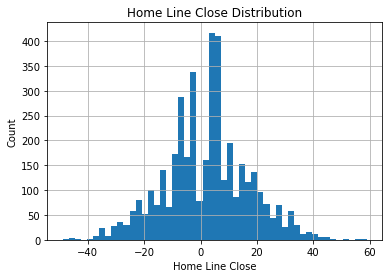

In [984]:
ax = q['Game Difference'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Home Line Close')
ax.set_title('Home Line Close Distribution')
pd.DataFrame(q['Game Difference'].describe())

The Game Differences seem fairly normal. However, we want to account for some outliers not throwing off our predictions, so allow us to filter those out. I'm going to start with 17 as that signifies a 3 possession game where teams that are down by 17 (since 2009) or more points going into halftime comeback to win about 6.38% of the time (source below). So we aren't betting (see what I did there) for that to happen anytime soon. However, when we look at the breakdown (shown below), almost 3 out of every game has a team winning by 17 or more points.

https://thecommutesports.com/2020/09/02/nfl-comeback-analysis/

In [986]:
g = (q['Game Difference'] <= int(-17)) | (q['Game Difference'] >= int(17))
g.value_counts(normalize=True)


False    0.728754
True     0.271246
Name: Game Difference, dtype: float64

I feel like 17 might take too many games out of the equation. Let's bump the total to 22, which is completely abitrary.

In [987]:
g = (q['Game Difference'] <= int(-22)) | (q['Game Difference'] >= int(22))
g.value_counts(normalize=True)

False    0.847581
True     0.152419
Name: Game Difference, dtype: float64

Honestly, I thought that 5 points would involve more games. Ok one last try, I'm going to go for 25 which would be 4 possession games.

In [988]:
g = (q['Game Difference'] <= int(-25)) | (q['Game Difference'] >= int(25))
g.value_counts(normalize=True)

False    0.890198
True     0.109802
Name: Game Difference, dtype: float64

Just over 10% seems ideal to me. Let's filter those values out beofre we calculate any further. 

In [1000]:
q = q[~(q['Game Difference'] >= int(-25)) | (q['Game Difference'] <= int(25))]
q['Game Difference'].value_counts()

 3.0     319
-3.0     256
 7.0     199
-7.0     172
 10.0    140
 6.0     133
 14.0    120
-6.0     115
-4.0     103
 4.0      98
-14.0     85
 1.0      85
-2.0      82
 8.0      81
-10.0     79
 5.0      78
 2.0      76
 21.0     73
-1.0      71
-8.0      69
 17.0     68
-5.0      63
-17.0     59
-13.0     56
 20.0     55
 11.0     54
 18.0     54
 24.0     49
 16.0     49
 13.0     48
-21.0     46
-11.0     44
-24.0     41
-18.0     41
-16.0     41
 9.0      39
 12.0     38
-20.0     34
 15.0     32
-15.0     29
 19.0     27
-9.0      24
 22.0     23
 25.0     23
 23.0     23
-12.0     22
-23.0     18
-19.0     17
-22.0     16
 0.0       7
Name: Game Difference, dtype: int64

In [823]:
q.columns.values.tolist()


['Tm_Away',
 'W_Away',
 'L_Away',
 'W-L%_Away',
 'PF_Away',
 'PA_Away',
 'PD_Away',
 'MoV_Away',
 'SoS_Away',
 'SRS_Away',
 'OSRS_Away',
 'DSRS_Away',
 'Year',
 'Yds_Away',
 'Ply_Away',
 'Y/Ply_Away',
 'TO_Away',
 'FL_Away',
 '1stD_Away',
 'Cmp_Away',
 'Pass_Att_Away',
 'Pass_Yds_Away',
 'P_TD_Away',
 'Int_Away',
 'Pass/A_Away',
 'P_1stD_Away',
 'Run_Att_Away',
 'Run_Yds_Away',
 'R_TD_Away',
 'Y/A_Away',
 'R_1stD_Away',
 'Pen_Away',
 'Pen_Yds_Away',
 'Pen_1st_Away',
 'Sc%_Away',
 'TO%_Away',
 'EXP_Away',
 'G_D_Away',
 'PF_D_Away',
 'Ply_D_Away',
 'Y/P_D_Away',
 'TO_D_Away',
 'FL_D_Away',
 'Cmp_D_Away',
 'Int_D_Away',
 'NY/A_D_Away',
 'Y/A_D_Away',
 'Pen_D_Away',
 '1stPy_D_Away',
 'Sc%_D_Away',
 'TO%_D_Away',
 'EXP_D_Away',
 'Total_Yds_D_Away',
 'Pass_1st_D_Away',
 'Pass_Att_D_Away',
 'Pass_Yds_D_Away',
 'Pass_TDs_D_Away',
 'Rush_1st_D_Away',
 'Rush_Att_D_Away',
 'Rush_Yds_D_Away',
 'Rush_TDs_D_Away',
 'Pen_1st_D_Away',
 'Pen_Yds_D_Away',
 'Tm_Home',
 'W_Home',
 'L_Home',
 'W-L%_Home',


With this list of names, we are going to first create line using our SRS, but we are also going to validate our information and make sure the appropriate stats are with the appropriate team whether that be "Home" or "Away".

In [824]:
q[['Game Difference', 'Home Line Open']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3989 entries, 0 to 3988
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Game Difference  3989 non-null   float64
 1   Home Line Open   3989 non-null   float64
dtypes: float64(2)
memory usage: 93.5 KB


In [ ]:
q[['Home Line Open', 'Predicted_Line', 'Home Cover']]

In [720]:
q[['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Line Open', 'Home Line Close', 'Predicted_Line','Game Difference', 'Home Cover']].sort_values(by ='Date', ascending= False)

,Date,Home Team,Away Team,Home Score,Away Score,Home Line Open,Home Line Close,Predicted_Line,Game Difference,Home Cover
1625,2021-01-03,Indianapolis Colts,Jacksonville Jaguars,28.0,14.0,-13.5,-15.5,-16.5,14.0,1
1643,2021-01-03,Denver Broncos,Las Vegas Raiders,31.0,32.0,-1.0,2.5,2.0,-1.0,0
1732,2021-01-03,Carolina Panthers,New Orleans Saints,7.0,33.0,5.5,6.0,8.7,-26.0,0
1756,2021-01-03,Tampa Bay Buccaneers,Atlanta Falcons,44.0,27.0,-6.0,-7.0,-10.7,17.0,1
1569,2021-01-03,Cleveland Browns,Pittsburgh Steelers,24.0,22.0,-7.0,-10.5,5.3,2.0,0
...,...,...,...,...,...,...,...,...,...,...
15,2014-09-07,Chicago Bears,Buffalo Bills,20.0,23.0,-6.5,-7.0,9.6,-3.0,0
183,2014-09-07,St. Louis Rams,Minnesota Vikings,6.0,34.0,-4.0,-3.0,-2.9,-28.0,0
198,2014-09-07,Tampa Bay Buccaneers,Carolina Panthers,14.0,20.0,-1.0,-5.5,4.7,-6.0,0
241,2014-09-07,Dallas Cowboys,San Francisco 49ers,17.0,28.0,5.0,3.5,-8.4,-11.0,0


We have an issue here: we are not discounting the year after year changes to a team. This is where our prediction models will be able to assist in telling us, on avergae, how much previous success or lackthereof will effect the next years predicitons.  

Because we combined so many elements of multiple dataframes, let's legitimize our data and make sure all the home data points to the home team,and the away data points to the away team. We will take all the separate elements and cross reference with the PFF website.  

In [721]:
q[['Date', 'Home Team', 'SRS_Home', 'Yds_Home', 'Away Team', 'Yds_Away','SRS_Away', 'Home Line Open', 'Predicted_Line','Game Difference', 'Winner']].sort_values(by ='Date', ascending= False)

,Date,Home Team,SRS_Home,Yds_Home,Away Team,Yds_Away,SRS_Away,Home Line Open,Predicted_Line,Game Difference,Winner
1625,2021-01-03,Indianapolis Colts,2.8,6049.0,Jacksonville Jaguars,5218.0,-11.7,-13.5,-16.5,14.0,1.0
1643,2021-01-03,Denver Broncos,-6.0,5369.0,Las Vegas Raiders,6133.0,-2.0,-1.0,2.0,-1.0,0.0
1732,2021-01-03,Carolina Panthers,-1.1,5592.0,New Orleans Saints,6023.0,9.6,5.5,8.7,-26.0,0.0
1756,2021-01-03,Tampa Bay Buccaneers,9.4,6145.0,Atlanta Falcons,5895.0,0.7,-6.0,-10.7,17.0,1.0
1569,2021-01-03,Cleveland Browns,-2.6,5913.0,Pittsburgh Steelers,5354.0,4.7,-7.0,5.3,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
15,2014-09-07,Chicago Bears,-6.7,5233.0,Buffalo Bills,5096.0,4.9,-6.5,9.6,-3.0,0.0
183,2014-09-07,St. Louis Rams,-0.8,5035.0,Minnesota Vikings,5048.0,-1.7,-4.0,-2.9,-28.0,0.0
198,2014-09-07,Tampa Bay Buccaneers,-9.8,4672.0,Carolina Panthers,5547.0,-3.1,-1.0,4.7,-6.0,0.0
241,2014-09-07,Dallas Cowboys,5.4,6138.0,San Francisco 49ers,5239.0,-1.0,5.0,-8.4,-11.0,0.0


That looks great. However, one aspect we have to adjust is the year to year change. Because some teams may improve more than other teams (which seems obvious), we have to account for a gradual change in our predicted line. Let's take a rolling average to level off that previous seasons results and the current seasons expectations. I'm using 4 as my window as it marks a quarter of the season comepleted.

In [1001]:
q.set_index('Date')
q['Predicted_Line_Rolling'] = q.groupby('Home Team')['Predicted_Line'].transform(lambda x: x.rolling(4, 1).mean())

q['Predicted_Line'] = q['Predicted_Line_Rolling']
q.drop('Predicted_Line_Rolling', axis=1, inplace=True)
q.reset_index()

,index,Tm_Away,W_Away,L_Away,W-L%_Away,PF_Away,PA_Away,PD_Away,MoV_Away,SoS_Away,...,PtsL,YdsW,TOW,YdsL,TOL,Home_Predict,Predicted_Line,Home Cover,P_1stD%_Home,R_1stD%_Home
0,0,New England Patriots,12,4,0.750,385,237,148,9.3,1.0,...,17,358,2,338,1,1,6.200,0,0.557093,0.342561
1,1,New England Patriots,12,4,0.750,385,237,148,9.3,1.0,...,6,265,0,255,4,1,6.000,0,0.564103,0.350427
2,2,New England Patriots,12,4,0.750,385,237,148,9.3,1.0,...,0,315,0,189,3,1,7.500,1,0.640569,0.291815
3,4,New England Patriots,12,4,0.750,385,237,148,9.3,1.0,...,34,455,1,319,1,0,2.300,1,0.640957,0.297872
4,5,New England Patriots,12,4,0.750,385,237,148,9.3,1.0,...,23,414,0,342,3,0,9.500,0,0.509579,0.402299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3569,3984,San Francisco 49ers,6,10,0.375,376,390,-14,-0.9,1.7,...,33,291,0,458,4,1,1.275,1,0.622642,0.309973
3570,3985,San Francisco 49ers,6,10,0.375,376,390,-14,-0.9,1.7,...,13,237,2,281,4,0,-9.150,1,0.542234,0.400545
3571,3986,San Francisco 49ers,6,10,0.375,376,390,-14,-0.9,1.7,...,27,350,0,351,2,0,-5.900,1,0.606742,0.311798
3572,3987,San Francisco 49ers,6,10,0.375,376,390,-14,-0.9,1.7,...,20,345,3,308,4,0,-5.125,0,0.585227,0.349432


# Plotting Moving Averages

KeyError: False

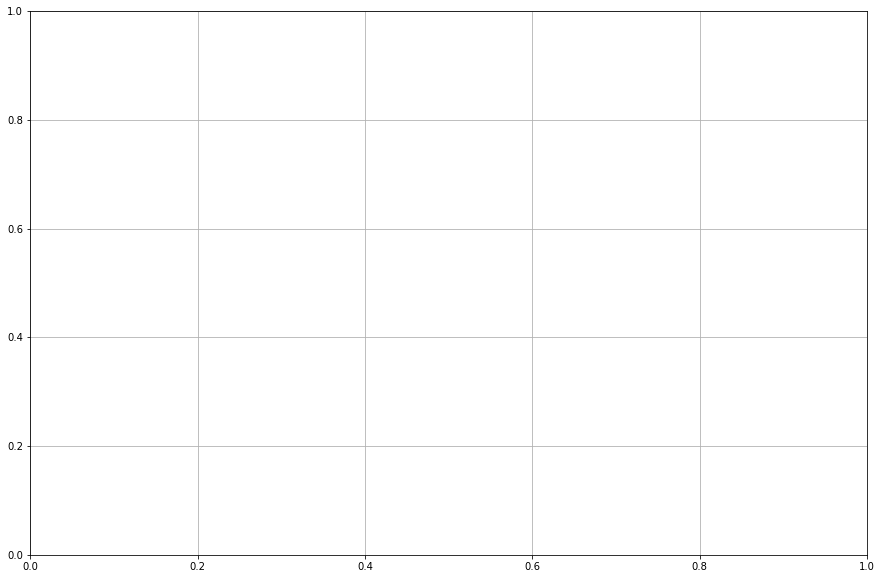

In [1003]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(q['Home Team'== "Green Bay Packers"]['Home Cover' == 1],label='GB')

plt.legend(loc=2)

Now that we have SRS as our "Home Base", let's see how effective it is at predicting results. We will have to compare that number to the actual game and see how those stack up against the vegas spread. Maybe the differences will be enlightening. Maybe they'll just be random!

What we need to train a model to do is find at what difference is seems like a bet with the highest probabilty to win over an extended period of time. Are we looking for a specific number difference, say 3 point between line and predicition? What about a percentage difference as the higher the score is projected to be the less each individual point matters.

We want to know which teams were the most profitable throughout the year, and if so, what conclusions can we make by looking deeper into that.

What we want to do:

Find games that are incorrectly priced based on SRS (add 2 for a Home field advantage). 

Figure out what stats (between 10-20) are most relevant when it comes to predicting games. Luckily, we singled out quite a few earlier in the case study.

# Modeling our dataframe

2/16

Modify data to different time intervals (weeks prior - how would that predict a name)

Understand a confusion matrix and other metrics to calculate

Look into accuracy of our model

Remove any features that are a result of the game. Then look at the performance from the week before. 




try 20% training and 80% testing

skilearn - DecisionTree()

Calculate the confusion matrix - should have a 3 by 3 columns because of our 3 results. 

Compare the accuracy of prediciton to the True Positive, 

Input for Vegas as input for model



The problem we have: we have all the stats in the world. We only should focus on the specifc statistics of both teams to see if any ones have a significant correlation to the home team covering. 

Let's get rid of our non-interger or float values so our model will be able to play with them. 

In [438]:
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'

#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
result_index = result.index
#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
result_columns = result.columns


In [914]:
print(list(q.columns))

['Tm_Away', 'W_Away', 'L_Away', 'W-L%_Away', 'PF_Away', 'PA_Away', 'PD_Away', 'MoV_Away', 'SoS_Away', 'SRS_Away', 'OSRS_Away', 'DSRS_Away', 'Year', 'Yds_Away', 'Ply_Away', 'Y/Ply_Away', 'TO_Away', 'FL_Away', '1stD_Away', 'Cmp_Away', 'Pass_Att_Away', 'Pass_Yds_Away', 'P_TD_Away', 'Int_Away', 'Pass/A_Away', 'P_1stD_Away', 'Run_Att_Away', 'Run_Yds_Away', 'R_TD_Away', 'Y/A_Away', 'R_1stD_Away', 'Pen_Away', 'Pen_Yds_Away', 'Pen_1st_Away', 'Sc%_Away', 'TO%_Away', 'EXP_Away', 'G_D_Away', 'PF_D_Away', 'Ply_D_Away', 'Y/P_D_Away', 'TO_D_Away', 'FL_D_Away', 'Cmp_D_Away', 'Int_D_Away', 'NY/A_D_Away', 'Y/A_D_Away', 'Pen_D_Away', '1stPy_D_Away', 'Sc%_D_Away', 'TO%_D_Away', 'EXP_D_Away', 'Total_Yds_D_Away', 'Pass_1st_D_Away', 'Pass_Att_D_Away', 'Pass_Yds_D_Away', 'Pass_TDs_D_Away', 'Rush_1st_D_Away', 'Rush_Att_D_Away', 'Rush_Yds_D_Away', 'Rush_TDs_D_Away', 'Pen_1st_D_Away', 'Pen_Yds_D_Away', 'Tm_Home', 'W_Home', 'L_Home', 'W-L%_Home', 'PF_Home', 'PA_Home', 'PD_Home', 'MoV_Home', 'SoS_Home', 'SRS_Home

OK, now let's pick what we think would impact the Home cover. I'm definitely going to be using the vegas open and predicted line. Let's see if some other offensive or defensiver stats are relavant. 

In [733]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Home Cover'), 
                                                    data['Home Cover'], test_size=0.3)

In [734]:
cat_mod = tree.DecisionTreeClassifier()

In [735]:
cat_mod.fit(X_train, y_train)

DecisionTreeClassifier()

In [736]:
cat_mod.feature_importances_

array([0.16318516, 0.23673233, 0.08448708, 0.10655886, 0.11278506,
       0.1454917 , 0.15075981])

In [737]:
list(zip(data.columns, cat_mod.feature_importances_))

[('Home Line Open', 0.16318516122728283),
 ('Predicted_Line', 0.23673232849721132),
 ('Home Cover', 0.08448707555228568),
 ('P_1stD_Home', 0.10655886144022977),
 ('Pass_1st_D_Home', 0.11278506384073686),
 ('R_1stD_Home', 0.14549170125853755),
 ('Rush_1st_D_Home', 0.150759808183716)]

Ok so our predicted line has a little more predictive power than the Home Line Open. Let's now run 2 separate tests:

    1. Measuring our projected line vs the Home_Line_Open.
    2. Measuring our projected eline vs Home Line Close.

In [1004]:
Open = q[['Home Line Open', 'Predicted_Line', 'Home Cover']]
X_train, X_test, y_train, y_test = train_test_split(Open.drop(columns='Home Cover'), 
                                                    Open['Home Cover'], test_size=0.3)
cat_mod = tree.DecisionTreeClassifier()
cat_mod.fit(X_train, y_train)
list(zip(Open.columns, cat_mod.feature_importances_))

[('Home Line Open', 0.26064276802424474),
 ('Predicted_Line', 0.7393572319757553)]

In [1006]:
q_na = q.dropna(how = 'any')

In [1007]:
Close = q_na[['Home Line Close', 'Predicted_Line', 'Home Cover']]
X_train, X_test, y_train, y_test = train_test_split(Close.drop(columns='Home Cover'), 
                                                    Close['Home Cover'], test_size=0.3)
cat_mod = tree.DecisionTreeClassifier()
cat_mod.fit(X_train, y_train)
list(zip(Close.columns, cat_mod.feature_importances_))

[('Home Line Close', 0.3054501118956243),
 ('Predicted_Line', 0.6945498881043757)]

Ok so looks like our Predicted line is more accurate than the Home Line Open but not as much compared to Home Line Close. This implies that the betting market knows that certain amounts are mispriced. However, keep in mind that this is only measuring home covers - it's been said the public likes favorites and home teams. If we compared these to away covers would the results be different?

Now I'm going to add some elements to add a layer of complexity to our model and see if there's other qualities that "covering teams" possess. I used the elements we previously focused on with strong correlations in a previous exercise. 

Sc%_D , DRSR 
Pass_1st_D,  EXP_D
SRS, Rush_Att_D
Sc%, L
SRS, Rush_Att_D
EXP_D, Rush_1st_D
W-L%, Sc%_D
NY/A_D, MoV 

P_1stD,  Pass_Yds
Pass/A,   Y/Ply
Total_Yds_D,  Y/P_D
Yds,   Pass/A
Sc%,    EXP 
1stD,    EXP 
1stD,    Pass_Yds
1stD       Y/Ply
OSRS       W-L%
NY/A_D     Sc%_D
Pass_Yds   Y/Ply
MoV        Sc%
Sc%_D       Total_Yds_D
1stD       P_TD 

In [ ]:
q['P_1stD%_Home'] = (q['P_1stD_Home']/ q['1stD_Home'])



In [1026]:
data = q[['Home Line Open', 'Predicted_Line', 'Home Cover', 'P_1stD_Home', 'P_1stD%_Home', 'Pass/A_Home', 'R_1stD_Home', 'Y/A_Home',\
          'R_1stD%_Home', 'Sc%_Home', 'TO_Home', 'Pen_1st_Away','Rush_1st_D_Home', 'Pass_1st_D_Home', 'TO%_D_Home',\
           'EXP_D_Home', 'Rush_Att_D_Home', 'Rush_1st_D_Home', 'NY/A_D_Home', 'Sc%_D_Home']]


In [1034]:

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Home Cover'), 
                                                    data['Home Cover'], test_size=0.3)
cat_mod = tree.DecisionTreeClassifier()
cat_mod.fit(X_train, y_train)
list(zip(data.columns, cat_mod.feature_importances_))

[('Home Line Open', 0.13852017019467808),
 ('Predicted_Line', 0.19631492548389637),
 ('Home Cover', 0.032995604749426734),
 ('P_1stD_Home', 0.05246840975391473),
 ('P_1stD%_Home', 0.03160175031223841),
 ('Pass/A_Home', 0.03537737551721016),
 ('R_1stD_Home', 0.01783059542471189),
 ('Y/A_Home', 0.02585967355839586),
 ('R_1stD%_Home', 0.022854695794632715),
 ('Sc%_Home', 0.024753421059479783),
 ('TO_Home', 0.11923455027142497),
 ('Pen_1st_Away', 0.022288894505477438),
 ('Rush_1st_D_Home', 0.05717501300115281),
 ('Pass_1st_D_Home', 0.03067760039378448),
 ('TO%_D_Home', 0.04346604236870237),
 ('EXP_D_Home', 0.05666423842392527),
 ('Rush_Att_D_Home', 0.019012651521968994),
 ('Rush_1st_D_Home', 0.027001757259689476),
 ('NY/A_D_Home', 0.045902630405289496)]

In [1035]:
from sklearn.metrics import confusion_matrix

In [1036]:
confusion_matrix(y_test, cat_mod.predict(X_test))

array([[330, 245],
       [268, 230]])

In [1037]:
confusion_matrix(y_test, cat_mod.predict(X_test), normalize='true')

array([[0.57391304, 0.42608696],
       [0.53815261, 0.46184739]])

In [1039]:
# Precision = tp/ (tp+fp)

precision = 330/(330 + 245)
print(precision)

0.5739130434782609


In [1032]:
# Recall = tp/ (tp+fn)

recall = 326/(326+303)
print(recall)

0.5182829888712241


In [879]:
# Specificity = tn/(tn + fn)

specificity = 268/(268 + 303)
print(specificity)

0.46935201401050786


In [880]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)

accuracy = (326 + 268)/ (326+268 + 300 +303)
print(accuracy)

0.49624060150375937


Now that we have had a look at all our confusion matrices, let's discuss some takeaways. Our predicted line is top dog when it comes to category importance. 

Another interesting note is the To% is very important as well - right up there with the vegas line.Weidly enough, it's mostly dependent on the offense's TO% while the defense importance sits at 0.035 - almost 1/5th of the offense's TO%. 

Lastly, this shows the high corrlation to passing success with home covers as passing success almost doubles every running metric. 

In [898]:
cat_mod.predict(X_train)


array([1, 0, 1, ..., 1, 0, 0])

[Text(186.62696531697944, 212.71304347826086, 'X[1] <= 2.15\ngini = 0.498\nsamples = 2792\nvalue = [1473, 1319]'),
 Text(93.26668808039844, 203.2591304347826, 'X[1] <= -13.35\ngini = 0.498\nsamples = 1905\nvalue = [899, 1006]'),
 Text(13.932799013563503, 193.80521739130435, 'X[0] <= -10.75\ngini = 0.432\nsamples = 282\nvalue = [89, 193]'),
 Text(8.050061652281135, 184.3513043478261, 'X[2] <= 173.5\ngini = 0.494\nsamples = 124\nvalue = [55, 69]'),
 Text(3.302589395807645, 174.89739130434782, 'X[12] <= 330.5\ngini = 0.444\nsamples = 33\nvalue = [22, 11]'),
 Text(2.752157829839704, 165.44347826086957, 'X[18] <= 23.55\ngini = 0.366\nsamples = 29\nvalue = [22, 7]'),
 Text(1.1008631319358817, 155.98956521739132, 'X[9] <= 28.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5504315659679409, 146.53565217391304, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(1.6512946979038226, 146.53565217391304, 'X[1] <= -18.2\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(1.1008631319358817, 137.

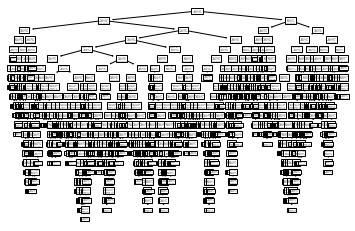

In [928]:
tree.plot_tree(cat_mod)

In [939]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Home Cover'), 
                                                    data['Home Cover'], test_size=0.3)
cat_mod = tree.DecisionTreeClassifier()
cat_mod.fit(X_train, y_train)
list(zip(data.columns, cat_mod.feature_importances_))

[('Home Line Open', 0.12935005974679636),
 ('Predicted_Line', 0.1869479476131549),
 ('Home Cover', 0.028455348608855884),
 ('P_1stD_Home', 0.05457981465224337),
 ('P_1stD%_Home', 0.030454927827853105),
 ('Pass/A_Home', 0.028522091275171257),
 ('R_1stD_Home', 0.03974457141888376),
 ('Y/A_Home', 0.03516714816140964),
 ('R_1stD%_Home', 0.04738695809054629),
 ('Sc%_Home', 0.031121559424750818),
 ('TO_Home', 0.09826446090628572),
 ('Pen_1st_Away', 0.019219985238877076),
 ('Rush_1st_D_Home', 0.03201165386404137),
 ('Pass_1st_D_Home', 0.04764595254415195),
 ('TO%_D_Home', 0.06149485219210484),
 ('EXP_D_Home', 0.050101682083025754),
 ('Rush_Att_D_Home', 0.02256633989683107),
 ('Rush_1st_D_Home', 0.014657536351322381),
 ('NY/A_D_Home', 0.04230711010369442)]

In [940]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Home Cover'), 
                                                    data['Home Cover'], test_size=0.3)
clf = tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)

#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform (X_test)

#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = clf.predict(X_tr_scaled)
y_te_pred = clf.predict(X_te_scaled)

median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2


(-0.9213181209200538, -0.9714631440959973)

In [941]:
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(0.4788681948424069, 0.49122807017543857)

In [938]:
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(0.48173352435530087, 0.4494569757727652)

# Hyperparameter for model / Gridsearch

In [1081]:
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression, k=4),
    LinearRegression()
)

In [1082]:
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=4,
                             score_func=<function f_regression at 0x7fb6eff208b0>)),
                ('linearregression', LinearRegression())])

In [1083]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=4,
                             score_func=<function f_regression at 0x7fb6eff208b0>)),
                ('linearregression', LinearRegression())])

In [1084]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [1085]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.048058543093703276, 0.06270461907938618)

In [1086]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.4713282834443948, 0.46794861886623995)

In [1087]:
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method

pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [1088]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [1089]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [1090]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=4,
                                                    score_func=<function f_regression at 0x7fb6eff208b0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [1091]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [1092]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 4}

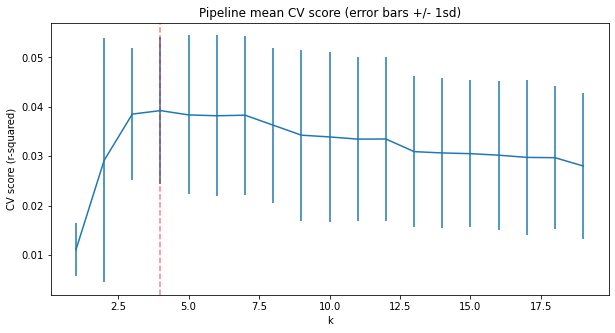

In [1093]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

Looks like we have our winner. 4 is the best fit for  our information. Let's run the Pipe again with k = 4 and see what becomes of it. 

In [1080]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()


In [1065]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Home Line Open    0.125526
TO_Home          -0.020598
Sc%_D_Home       -0.023066
Predicted_Line   -0.091675
dtype: float64

Ok there's a random row in there - looks like it signifies the begining of the playoffs. Now, let's examine the other data. After quick glance, it appears the data is organized in ascending order.

The datatypes look good but we will need to change the dates to a datetime format so we can manipulate that.

I want to be able to compare some pooled data to the same years and average statistics behind them. Let's change the 'Date' column to get the dataset separated into different years. 

I'm thinking I might need to set the index to a single team so I have a cooperative way to compare the statistics to the actual lines. Let's try it both ways to determine if that is possible or not. 

Got an error! Maybe we have to set the index to that specific Datetime Index, first. Let's try it!

In [ ]:
df['Date'] = pd.DatetimeIndex(data=df['Date'])


That's not working. Let's try to just reset the index to the Date and see what comes of it.

In [ ]:
df.index

In [ ]:
df = df.set_index('Home Team')

In [ ]:
df.index

That didn't quite work how we expected. Let's reset the index and try again.

In [ ]:
df = df.set_index('Date')

Let's see what some of our most common scores match up to the Vegas predictions. For this exercise, we will use the Open and Closing lines for the home team. 

In [ ]:
ax = df['Game Difference'].hist(bins=60)
ax.set_ylabel('Distribution')
ax.set_xlabel('Points')
ax.set_title('Game Scores')
pd.DataFrame(df['Game Difference'].describe())

So it appears that at the peek, the home team has a consistent track record of winning closer games with the mean 3, or the amount equal to a field goal. Another interesting note is the STD being nearly 14.8 points. This is significant! This tells us that if you get even a single deviation away from the mean, the game could quickly slip away from a team and turn into a 2 score game. Overall, our graph looks normal with the results skewed slightly to the right. 

Now, let's take a look at the Vegas Open lines for an individual week and see how they use some of these common football knowledge (knowing that field goals are worth 3, and the most common scores of games are 3, -3, -7, and 7 in that order).

In [ ]:
ax = df['Home Line Open'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Home Odds Open')
ax.set_title('Home Line Open Distribution')
pd.DataFrame(df['Home Line Open'].describe())


Hmmm interesting. Looks like vegas is right on the money (remember, the minus in the line represents the amount of 'handicapping' Las Vegas is doing. The means of the actual scores, and the Vegas predictions are very close! However, the standard deviation between the 2 couldn't be more off. Is this because Las Vegas will always be prudent with their predicitons, while in reality, crazy events like a 59 point game difference (Vegas boldest prediction was -19) will skew the results? Let's quickly see how the numbers look being on the market for the week and see what they closed at.  


,Home Line Close
count,1858.000000
mean,-2.048170
std,5.861369
min,-21.500000
25%,-6.000000
50%,-3.000000
75%,3.000000
max,18.000000


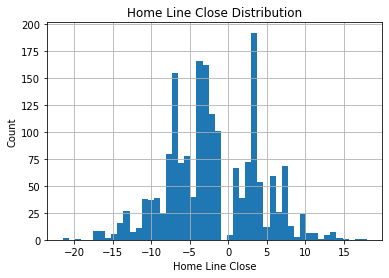

In [945]:
ax = q['Home Line Close'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Home Line Close')
ax.set_title('Home Line Close Distribution')
pd.DataFrame(df['Home Line Close'].describe())

Looks like our average game score is pretty darn close to our normal score. Does Vegas purposefully price their teams higher before they are ultimetly bet down? The relationship between the opening and closing can give us some insight into how the oddsmaker feels comfortable moving their point spread. I wonder what teams (if any) they prefer doing this for? Also, looking at the difference between the starting mean vs closing, you can see there's an average of nearly a half point (0.4) between start and finish. 

Finally, we removed the outliers prior to this. Lets compare how these outliers will impact our results. 

,Predicted_Line
count,3989.000000
mean,-2.066282
std,8.697859
min,-30.500000
25%,-8.100000
50%,-2.100000
75%,3.900000
max,26.500000


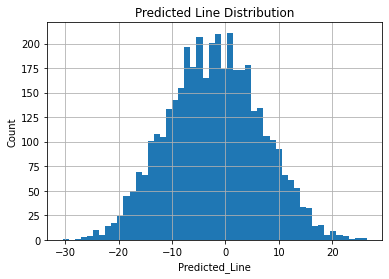

In [963]:
ax = q['Predicted_Line'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Predicted_Line')
ax.set_title('Predicted Line Distribution')
pd.DataFrame(q['Predicted_Line'].describe())

,Predicted_Line
count,3574.000000
mean,-1.792928
std,6.104269
min,-24.100000
25%,-6.150000
50%,-1.675000
75%,2.425000
max,20.375000


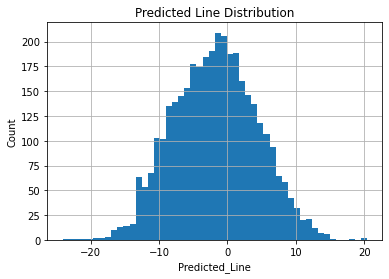

In [1041]:
ax = q['Predicted_Line'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Predicted_Line')
ax.set_title('Predicted Line Distribution')
pd.DataFrame(q['Predicted_Line'].describe())

Now that we have our info lined up, let's see if there's a difference in our Home Lines.

,Home Line Open
count,3574.000000
mean,-2.330302
std,5.831104
min,-27.000000
25%,-6.500000
50%,-3.000000
75%,2.500000
max,19.000000


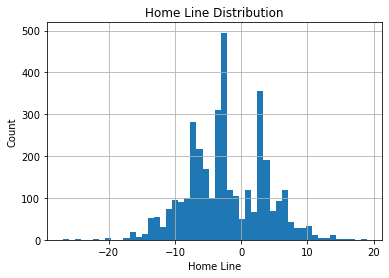

In [1043]:
ax = q['Home Line Open'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Home Line')
ax.set_title('Home Line Distribution')
pd.DataFrame(q['Home Line Open'].describe())

,Home Line Close
count,1675.000000
mean,-2.026269
std,5.712462
min,-21.500000
25%,-6.000000
50%,-3.000000
75%,3.000000
max,15.000000


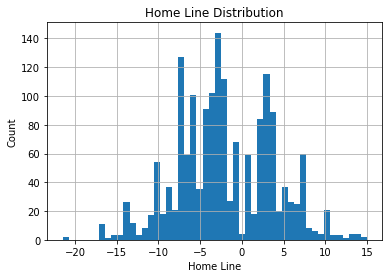

In [1046]:
ax = q['Home Line Close'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Home Line')
ax.set_title('Home Line Distribution')
pd.DataFrame(q['Home Line Close'].describe())

,Game Difference
count,3574.000000
mean,1.355624
std,11.384571
min,-24.000000
25%,-6.000000
50%,3.000000
75%,9.000000
max,25.000000


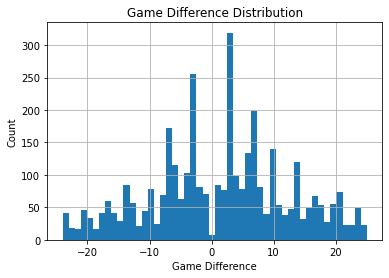

In [1044]:
ax = q['Game Difference'].hist(bins=50)
ax.set_ylabel('Count')
ax.set_xlabel('Game Difference')
ax.set_title('Game Difference Distribution')
pd.DataFrame(q['Game Difference'].describe())

Wooh there's some noisy stats -- but that's also indicative of the violtile nature of the sport. With a STD of over a score, seems like the NFL earns the phrase "any given Sunday" with the spread of these scores. 

,mean,std
Home Cover,,
0,-0.445537,8.494971
1,-3.878970,8.565480


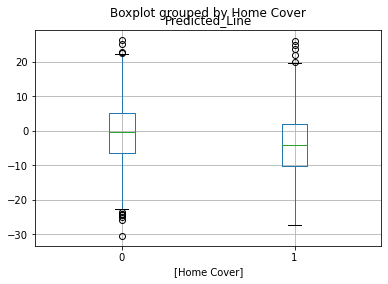

In [958]:
q.boxplot(column=['Predicted_Line'],by = ['Home Cover'])
pd.DataFrame(q.groupby( ['Home Cover'])['Predicted_Line'].describe().loc[:,['mean','std']])


In [960]:
rvs1 = q[q['Home Cover'] == 1]['Predicted_Line']
rvs2 = q[q['Home Cover'] == 0]['Predicted_Line']
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=-12.693668000722342, pvalue=3.191794383409789e-36)

,mean,std
Home Cover,,
0,-1.942814,5.834167
1,-2.151270,5.901424


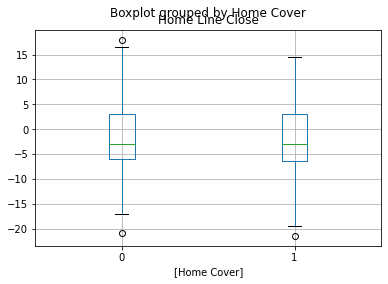

In [952]:
q.boxplot(column=['Home Line Close'],by = ['Home Cover'])
pd.DataFrame(q.groupby( ['Home Cover'])['Home Line Close'].describe().loc[:,['mean','std']])


In [954]:
from scipy import stats

In [1045]:
rvs1 = q[q['Home Cover'] == 1]['Home Line Open']
rvs2 = q[q['Home Cover'] == 0]['Home Line Open']
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=7.101405776941527, pvalue=1.4833599384565352e-12)

In [964]:
q['Tm_Away'].unique()

array(['New England Patriots', 'New York Jets', 'Buffalo Bills',
       'Miami Dolphins', 'Baltimore Ravens', 'Cincinnati Bengals',
       'Pittsburgh Steelers', 'Cleveland Browns', 'Indianapolis Colts',
       'Tennessee Titans', 'Jacksonville Jaguars', 'Houston Texans',
       'San Diego Chargers', 'Kansas City Chiefs', 'Denver Broncos',
       'Oakland Raiders', 'Philadelphia Eagles', 'Dallas Cowboys',
       'New York Giants', 'Washington Redskins', 'Chicago Bears',
       'Green Bay Packers', 'Minnesota Vikings', 'Detroit Lions',
       'New Orleans Saints', 'Carolina Panthers', 'Atlanta Falcons',
       'Tampa Bay Buccaneers', 'Seattle Seahawks', 'St. Louis Rams',
       'San Francisco 49ers', 'Arizona Cardinals', 'Los Angeles Rams',
       'Los Angeles Chargers', 'Las Vegas Raiders',
       'Washington Football Team'], dtype=object)

,Tm_Away
Tm_Away,
Arizona Cardinals,124
Atlanta Falcons,124
Baltimore Ravens,133
Buffalo Bills,122
Carolina Panthers,122
Chicago Bears,121
Cincinnati Bengals,122
Cleveland Browns,120
Dallas Cowboys,124


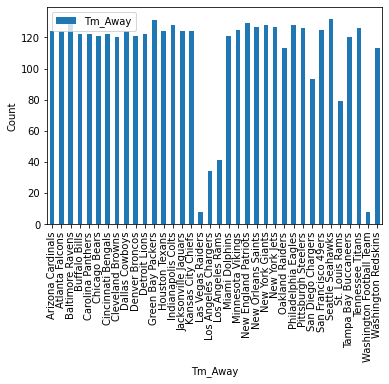

In [965]:
q.groupby([ 'Tm_Away'])[['Tm_Away']].count().plot(kind='bar').set_ylabel('Count')
q.groupby(['Tm_Away' ])[['Tm_Away']].count()

,Home Cover
Tm_Away,
Arizona Cardinals,0.401869
Atlanta Falcons,0.474576
Baltimore Ravens,0.450000
Buffalo Bills,0.401961
Carolina Panthers,0.459459
Chicago Bears,0.490385
Cincinnati Bengals,0.412844
Cleveland Browns,0.486957
Dallas Cowboys,0.469565


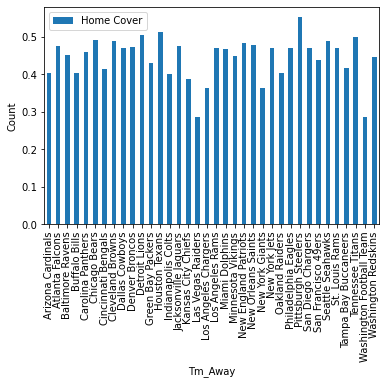

In [1047]:
q.groupby([ 'Tm_Away'])[['Home Cover']].mean().plot(kind='bar').set_ylabel('Count')
q.groupby(['Tm_Away' ])[['Home Cover']].mean()

In [968]:
contigency= pd.crosstab(q['Tm_Home'], q['Home Cover'],  normalize='index')
contigency

Home Cover,0,1
Tm_Home,,
Arizona Cardinals,0.491935,0.508065
Atlanta Falcons,0.531746,0.468254
Baltimore Ravens,0.504000,0.496000
Buffalo Bills,0.483333,0.516667
Carolina Panthers,0.532258,0.467742
Chicago Bears,0.568000,0.432000
Cincinnati Bengals,0.508197,0.491803
Cleveland Browns,0.541667,0.458333
Dallas Cowboys,0.564516,0.435484


Game Difference

In [ ]:
ax = df['Away Odds Open'].hist(bins=100, density = True)
ax.set_ylabel('Distribution')
ax.set_xlabel('Odds')
ax.set_title('Away Odds')
pd.DataFrame(df['Away Odds Open'].describe())

In [ ]:
ax = df['Home Line Open'].hist(bins=100, density = True)
ax.set_ylabel('Distribution')
ax.set_xlabel('Home Line')
ax.set_title('Home Line Opening')
pd.DataFrame(df['Home Line Open'].describe())

In [ ]:
ax = df['Home Line Open'].hist(bins=60)
ax.set_ylabel('Distribution')
ax.set_xlabel('Home Line')
ax.set_title('Home Line Opening')
pd.DataFrame(df['Home Line Open'].describe())

Let's go ahead and look and see what the stats for the actual score 

In [ ]:
combined = df.groupby([ 'Actual Score Difference'])['Vegas Line Open VS Actual Difference'].count().plot(kind='bar').set_ylabel('Count')


### Identify Missing Values

In [ ]:
#df['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

In [ ]:
df.info()

In [ ]:
df.loc[df['Away Score'] == 0]


In [ ]:
df.dropna(axis = 1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.loc[df['Away Score'] == 0]

In [ ]:
df['Date'] =  pd.to_datetime(df['Date'],
                              format='%Y-%m-%d')

In [ ]:
df.dtypes

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.head()

In [ ]:
df.resample('m').sum()

In [ ]:
score_0 = df.loc[df['Away Score'] == 0]
score_0.dtypes

In [ ]:
score_0.resample('m')

# Equations Inspired By FiveThrityEight's Elo Model

What about home-field advantage?

I can account for that, too. Historically, it’s been worth about 65 Elo ratings points or 2.6 NFL points. Just add that to the point spread.

What if you want to calculate a team’s probability of winning?

That’s pretty easy, too, although you’ll need a formula for it. In a game between Team A and Team B, Team A’s win probability is equal to:

Pr(A) = 1 / (10^(-ELODIFF/400) + 1)

Where ELODIFF is Team A’s Elo rating minus Team B’s Elo rating.

Autocorrelation is the tendency of a time series to be correlated with its past and future values. Let me put this into football terms. Imagine I have the Dallas Cowboys rated at 1550 before a game against the Philadelphia Eagles. Their rating will go up if they win and go down if they lose. But it should be 1550 after the game, on average. That’s important, because it means that I’ve accounted for all the information you’ve given me efficiently. If I expected the Cowboys’ rating to rise to 1575 on average after the game, I should have rated them more highly to begin with.

It’s true that if I have the Cowboys favored against the Eagles, they should win more often than they lose. But the way I was originally designed, I can compensate by subtracting more points for a loss than I give them for a win. Everything balances out rather elegantly.

The problem comes when I also seek to account for margin of victory. Not only do favorites win more often, but when they do win, they tend to win by a larger margin. Since I give more credit for larger wins, this means that their ratings tend to get inflated over time.

So, how do you correct for this?

It isn’t complicated in principle. You just have to discount the margin of victory more when favorites win and increase it when underdogs win. The formula for it is as follows:

Margin of Victory Multiplier = LN(ABS(PD)+1) * (2.2/((ELOW-ELOL)*.001+2.2))

Where PD is the point differential in the game, ELOW is the winning team’s Elo Rating before the game, and ELOL is the losing team’s Elo Rating before the game.

I see that you have ratings for this year’s teams, but they haven’t played any games yet! How does that work?

I take their rating from the end of last season and discount it slightly. Specifically, I revert it to the mean by one-third. Remember that the mean Elo rating is 1500. So, if a team finished last season with a rating of 1800, I’ll revert it to 1700 when the new season begins. 

https://fivethirtyeight.com/features/introducing-nfl-elo-ratings/
